# 🚗 SmartRide - Processus ETL et Business Intelligence

## 📌 Contexte du Projet

**SmartRide** est une plateforme de covoiturage intelligente permettant de connecter conducteurs et passagers en Tunisie. Ce notebook fait partie d'un projet global visant à implémenter un système décisionnel complet.

## 🎯 Objectifs

1. **Mettre en œuvre un processus BI complet** à partir de données existantes
2. **Concevoir et implémenter un processus ETL** (Extract, Transform, Load)
3. **Construire un entrepôt de données (Data Warehouse)** basé sur un modèle en étoile
4. **Utiliser les outils Power BI** pour l'analyse et la visualisation des données
5. **Intégrer les résultats décisionnels (dashboards)** dans l'application MERN SmartRide

## 📊 Structure du Notebook

**Partie 1**: Exploration et Visualisation des Données
**Partie 2**: Transformation et Nettoyage (ETL)
**Partie 3**: Construction du Data Warehouse (Modèle en Étoile) 

# 📁 PARTIE 1 : Exploration et Visualisation des Données

## 1.1 Importation des Bibliothèques

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1.2 Chargement des Données

In [207]:
df = pd.read_csv('data/raw/smartride_events_2025.csv')

## 1.3 Aperçu Initial des Données

In [208]:
print("Premières lignes du dataset :")
df.head(10)

Premières lignes du dataset :


,event_id,event_type,event_ts,trip_id,trip_publish_ts,trip_departure_ts,departure_city,destination_city,driver_id,driver_name,passenger_id,passenger_name,price_per_seat,seats_total,seats_change,reservation_id,reservation_status
0,EVTWTCMBLEPSO,trip_published,2025-01-01 00:00:00,TRP2379,2025-01-01 00:00:00,2025-01-01 23:10:00,Hammamet,Jendouba,DRV0051,Rim Karray,NaN,NaN,17.9,2,0,NaN,NaN
1,EVTMNO8ECTALU,trip_published,2025-01-01 00:00:00,TRP1694,2025-01-01 00:00:00,2025-01-11 08:05:00,Manouba,Zarzis,DRV0038,Ilyes Dali,NaN,NaN,23.8,3,0,NaN,NaN
2,EVT2I5SGFCFLJ,trip_published,2025-01-01 00:00:00,TRP2394,2025-01-01 00:00:00,2025-01-01 12:00:00,Ariana,Mahdia,DRV0044,Wassim Mansouri,NaN,NaN,15.8,3,0,NaN,NaN
3,EVTQA4P3PRNO5,trip_published,2025-01-01 00:00:00,TRP0502,2025-01-01 00:00:00,2025-01-15 04:15:00,Jendouba,Nabeul,DRV0034,Mariem Bouslama,NaN,NaN,28.4,4,0,NaN,NaN
4,EVT6IXAQ7NXNG,trip_published,2025-01-01 00:00:00,TRP1533,2025-01-01 00:00:00,2025-01-13 14:10:00,Kebili,Hammamet,DRV0026,Mariem Trabelsi,NaN,NaN,25.7,4,0,NaN,NaN
5,EVTAWE3IAVX56,trip_published,2025-01-01 00:00:00,TRP0514,2025-01-01 00:00:00,2025-01-01 02:35:00,Zarzis,Monastir,DRV0057,Sami Bouazizi,NaN,NaN,20.8,4,0,NaN,NaN
6,EVTPGSV21K4ER,reservation_created,2025-01-01 00:04:11,TRP2394,2025-01-01 00:00:00,2025-01-01 12:00:00,Ariana,Mahdia,DRV0044,Wassim Mansouri,PAS0351,Wassim Zouari,15.8,3,1,RSVZTW87YFTCL,active
7,EVTTRRR1G7SVE,reservation_created,2025-01-01 00:06:15,TRP0514,2025-01-01 00:00:00,2025-01-01 02:35:00,Zarzis,Monastir,DRV0057,Sami Bouazizi,PAS0415,Mehdi Souissi,20.8,4,1,RSVFQU0LMRFY1,active
8,EVTVJMJIKPEJD,reservation_created,2025-01-01 00:06:59,TRP0514,2025-01-01 00:00:00,2025-01-01 02:35:00,Zarzis,Monastir,DRV0057,Sami Bouazizi,PAS0114,Ahmed Bouslama,20.8,4,2,RSVKV5C1SUGSG,active
9,EVTX2K3PMM7TI,reservation_created,2025-01-01 00:20:25,TRP0514,2025-01-01 00:00:00,2025-01-01 02:35:00,Zarzis,Monastir,DRV0057,Sami Bouazizi,PAS0463,Khalil Trabelsi,20.8,4,1,RSV75MM6M07EF,active


In [209]:
print(" Dernières lignes du dataset :")
df.tail(10)

 Dernières lignes du dataset :


,event_id,event_type,event_ts,trip_id,trip_publish_ts,trip_departure_ts,departure_city,destination_city,driver_id,driver_name,passenger_id,passenger_name,price_per_seat,seats_total,seats_change,reservation_id,reservation_status
10686,EVTJ6VRUFFDZT,reservation_created,2025-12-30 01:27:03,TRP0337,2025-12-29 07:05:00,2025-12-31 19:05:00,Hammamet,Ariana,DRV0043,Nour Ben Youssef,PAS0270,Wassim Gharbi,7.1,4,1,RSV4C9LI03GDI,active
10687,EVT8JYPAKXASO,reservation_created,2025-12-30 06:53:42,TRP0337,2025-12-29 07:05:00,2025-12-31 19:05:00,Hammamet,Ariana,DRV0043,Nour Ben Youssef,PAS0493,Hedi Khelifi,7.1,4,1,RSV9551AXTO8D,active
10688,EVTU7YXMRASY6,reservation_cancelled,2025-12-30 10:52:32,TRP0612,2025-12-14 03:45:00,2025-12-30 11:45:00,Gabes,Djerba,DRV0050,Wassim Dali,PAS0189,Eya Zouari,14.6,3,-2,RSV7KMFDWLTRV,cancelled
10689,EVTKKRQV0HAMZ,reservation_created,2025-12-30 17:09:59,TRP0963,2025-12-28 22:55:00,2025-12-31 07:55:00,Sousse,Sfax,DRV0012,Ameni Bouslama,PAS0184,Asma Ferjani,19.6,4,1,RSVOT85GRR202,active
10690,EVTGAJ30S2TJN,reservation_created,2025-12-30 17:33:25,TRP2049,2025-12-21 21:05:00,2025-12-31 08:05:00,Zarzis,Mahdia,DRV0036,Hedi Ben Youssef,PAS0455,Mariem Jebali,21.9,3,1,RSV0O6PZ6LZSS,active
10691,EVTX4RQMYITAH,reservation_created,2025-12-30 23:15:51,TRP0963,2025-12-28 22:55:00,2025-12-31 07:55:00,Sousse,Sfax,DRV0012,Ameni Bouslama,PAS0104,Ilyes Zouari,19.6,4,1,RSVFMQ3MHJ8OW,active
10692,EVTZ5QSETI9FW,reservation_created,2025-12-31 01:17:36,TRP0963,2025-12-28 22:55:00,2025-12-31 07:55:00,Sousse,Sfax,DRV0012,Ameni Bouslama,PAS0321,Mouna Masmoudi,19.6,4,1,RSVQ1IU7R3371,active
10693,EVTTNY89V8VYG,reservation_cancelled,2025-12-31 10:00:56,TRP0337,2025-12-29 07:05:00,2025-12-31 19:05:00,Hammamet,Ariana,DRV0043,Nour Ben Youssef,PAS0270,Wassim Gharbi,7.1,4,-1,RSV4C9LI03GDI,cancelled
10694,EVTDH6J9MW9AB,reservation_cancelled,2025-12-31 11:14:59,TRP1263,2025-12-16 09:00:00,2025-12-31 17:00:00,Kebili,Kairouan,DRV0022,Asma Zouari,PAS0083,Sami Guezguez,20.6,3,-1,RSV7TVYBGWHLC,cancelled
10695,EVTI000LICSJP,reservation_created,2025-12-31 16:39:28,TRP0337,2025-12-29 07:05:00,2025-12-31 19:05:00,Hammamet,Ariana,DRV0043,Nour Ben Youssef,PAS0475,Aziz Kouki m,7.1,4,2,RSVKFXMXJPDTU,active


In [210]:
print("Échantillon aléatoire du dataset:")
df.sample(5)

Échantillon aléatoire du dataset:


,event_id,event_type,event_ts,trip_id,trip_publish_ts,trip_departure_ts,departure_city,destination_city,driver_id,driver_name,passenger_id,passenger_name,price_per_seat,seats_total,seats_change,reservation_id,reservation_status
2440,EVTDI62AQGXFV,reservation_created,2025-03-14 22:41:11,TRP1964,2025-03-06 23:00:00,2025-03-20 09:00:00,Zarzis,Djerba,DRV0007,Ameni Trabelsi,PAS0353,Aziz Souissi,13.8,3,1,RSVGG2XK5D18C,active
5858,EVT9ONVA0WDYM,reservation_created,2025-07-13 05:33:00,TRP0177,2025-07-12 20:45:00,2025-07-15 07:45:00,Beja,Manouba,DRV0051,Rim Karray,PAS0329,Mariem Souissi,20.9,3,1,RSV2VFCPDIJZS,active
796,EVTWI9RAR17PQ,reservation_created,2025-01-20 22:11:10,TRP1626,2025-01-15 05:25:00,2025-01-31 14:25:00,Kairouan,Gafsa,DRV0004,Mouna Souissi,PAS0120,Mehdi Bouslama,20.3,4,1,RSVXIYDBDPTKZ,active
4184,EVTCEY4IH9PVH,reservation_created,2025-05-17 07:11:50,TRP0224,2025-05-14 21:20:00,2025-05-21 00:20:00,Jendouba,Gabes,DRV0022,Asma Zouari,PAS0416,Ines Jebali,5.0,4,1,RSV9UMTIUWQ0W,active
5984,EVTH7W5GLO1BX,trip_published,2025-07-17 01:45:00,TRP0911,2025-07-17 01:45:00,2025-07-20 04:45:00,Beja,Kairouan,DRV0031,Youssef Masmoudi,NaN,NaN,11.2,2,0,NaN,NaN


## 1.4 Informations sur la Structure des Données

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10696 entries, 0 to 10695
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            10696 non-null  object 
 1   event_type          10696 non-null  object 
 2   event_ts            10696 non-null  object 
 3   trip_id             10696 non-null  object 
 4   trip_publish_ts     10696 non-null  object 
 5   trip_departure_ts   10696 non-null  object 
 6   departure_city      10696 non-null  object 
 7   destination_city    10696 non-null  object 
 8   driver_id           10696 non-null  object 
 9   driver_name         10696 non-null  object 
 10  passenger_id        8096 non-null   object 
 11  passenger_name      8096 non-null   object 
 12  price_per_seat      10696 non-null  float64
 13  seats_total         10696 non-null  int64  
 14  seats_change        10696 non-null  int64  
 15  reservation_id      8096 non-null   object 
 16  rese

In [212]:
dtype_df = pd.DataFrame({
    'Colonne': df.dtypes.index,
    'Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values
})
dtype_df

,Colonne,Type,Non-Null Count,Null Count
0,event_id,object,10696,0
1,event_type,object,10696,0
2,event_ts,object,10696,0
3,trip_id,object,10696,0
4,trip_publish_ts,object,10696,0
5,trip_departure_ts,object,10696,0
6,departure_city,object,10696,0
7,destination_city,object,10696,0
8,driver_id,object,10696,0
9,driver_name,object,10696,0


## 1.5 Analyse des Valeurs Manquantes

In [213]:
missing_data = pd.DataFrame({
    'Valeurs Manquantes': df.isna().sum(),
    'Pourcentage (%)': (df.isna().sum() / len(df) * 100).round(2)
}).sort_values('Valeurs Manquantes', ascending=False)
missing_data

,Valeurs Manquantes,Pourcentage (%)
reservation_status,2600,24.31
reservation_id,2600,24.31
passenger_name,2600,24.31
passenger_id,2600,24.31
driver_name,0,0.00
seats_change,0,0.00
seats_total,0,0.00
price_per_seat,0,0.00
event_id,0,0.00
event_type,0,0.00


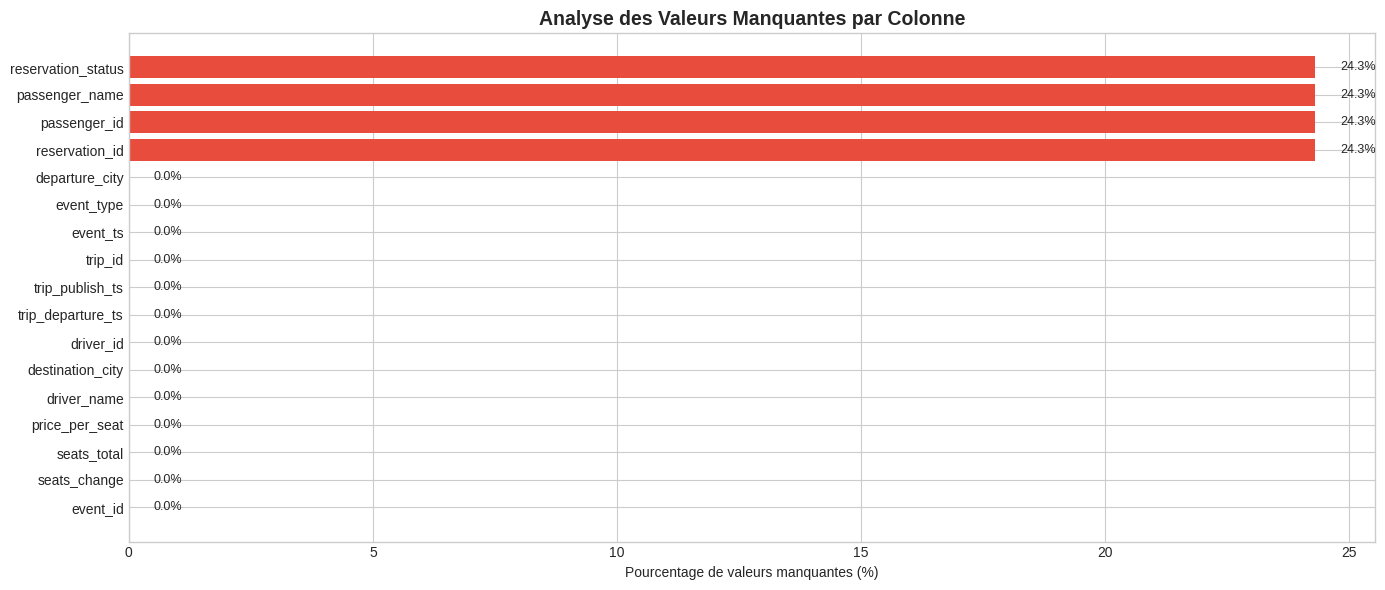

In [214]:
fig, ax = plt.subplots(figsize=(14, 6))
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=True)
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in missing_pct]
bars = ax.barh(missing_pct.index, missing_pct.values, color=colors)
ax.set_xlabel('Pourcentage de valeurs manquantes (%)')
ax.set_title('Analyse des Valeurs Manquantes par Colonne', fontsize=14, fontweight='bold')
for bar, val in zip(bars, missing_pct.values):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
            va='center', fontsize=9)
plt.tight_layout()
plt.show()

## 1.6 Statistiques Descriptives

In [215]:
print(" Statistiques descriptives (describe):")
df.describe()

 Statistiques descriptives (describe):


,price_per_seat,seats_total,seats_change
count,10696.000000,10696.000000,10696.000000
mean,17.726318,3.148747,0.716062
std,6.886763,0.690437,0.706126
min,5.000000,2.000000,-2.000000
25%,12.400000,3.000000,0.000000
50%,17.200000,3.000000,1.000000
75%,22.600000,4.000000,1.000000
max,44.400000,4.000000,2.000000


## 1.7 Analyse des Valeurs Uniques (Value Counts)

In [216]:
print("Distribution des types d'événements (event_type):")

event_counts = df['event_type'].value_counts()
event_pct = df['event_type'].value_counts(normalize=True) * 100

event_summary = pd.DataFrame({
    'Nombre': event_counts,
    'Pourcentage (%)': event_pct.round(2)
})
event_summary

Distribution des types d'événements (event_type):


,Nombre,Pourcentage (%)
event_type,,
reservation_created,7494,70.06
trip_published,2600,24.31
reservation_cancelled,602,5.63


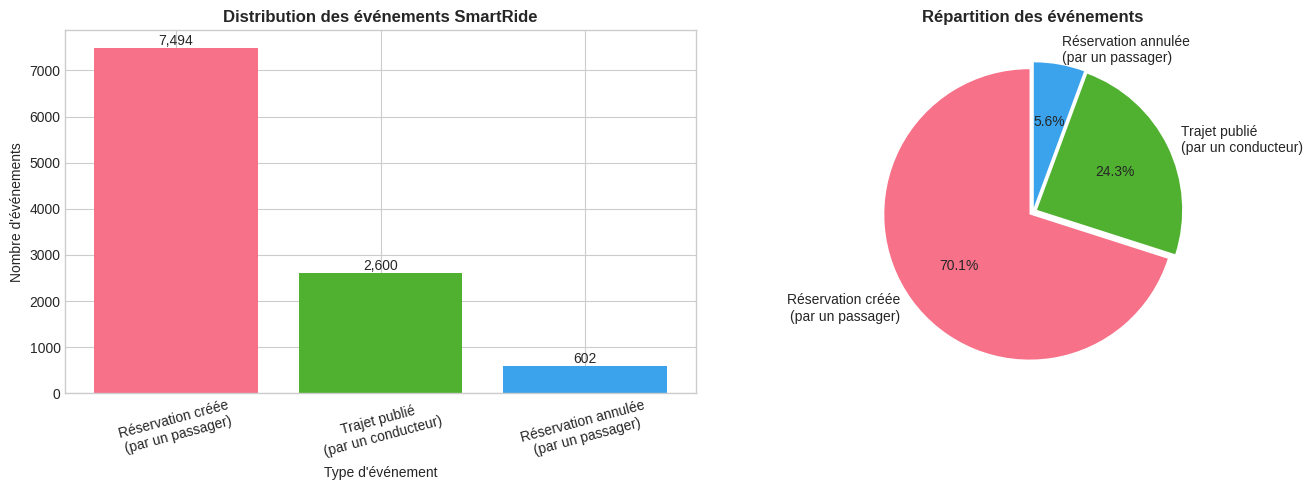

In [217]:
event_labels = {
    "reservation_created": "Réservation créée\n(par un passager)",
    "trip_published": "Trajet publié\n(par un conducteur)",
    "reservation_cancelled": "Réservation annulée\n(par un passager)"
}
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

labels = [event_labels[e] for e in event_counts.index]

# Bar chart
colors = sns.color_palette('husl', len(event_counts))
bars = axes[0].bar(labels, event_counts.values, color=colors)

axes[0].set_xlabel("Type d'événement")
axes[0].set_ylabel("Nombre d'événements")
axes[0].set_title("Distribution des événements SmartRide", fontweight="bold")
axes[0].tick_params(axis='x', rotation=15)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Pie chart
axes[1].pie(
    event_counts.values,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    explode=[0.03] * len(event_counts)
)
axes[1].set_title("Répartition des événements", fontweight="bold")

plt.tight_layout()
plt.show()


In [218]:
print("Distribution des villes de départ:")
departure_counts = df['departure_city'].value_counts()
departure_counts

Distribution des villes de départ:


departure_city
Ben Arous    676
Zarzis       599
Beja         588
Jendouba     585
Kebili       573
Kairouan     557
Hammamet     550
Mahdia       547
Tozeur       540
Bizerte      538
Sfax         532
Ariana       530
Djerba       523
Monastir     522
Gabes        512
Sousse       511
Nabeul       493
Manouba      448
Gafsa        444
Tunis        428
Name: count, dtype: int64

In [219]:
print("Distribution des villes de destination:")
destination_counts = df['destination_city'].value_counts()
destination_counts

Distribution des villes de destination:


destination_city
Sfax         642
Gabes        616
Mahdia       600
Beja         571
Ben Arous    571
Tunis        556
Kebili       554
Kairouan     553
Tozeur       544
Manouba      537
Monastir     526
Ariana       526
Bizerte      526
Hammamet     512
Gafsa        512
Nabeul       493
Zarzis       480
Djerba       479
Sousse       470
Jendouba     428
Name: count, dtype: int64

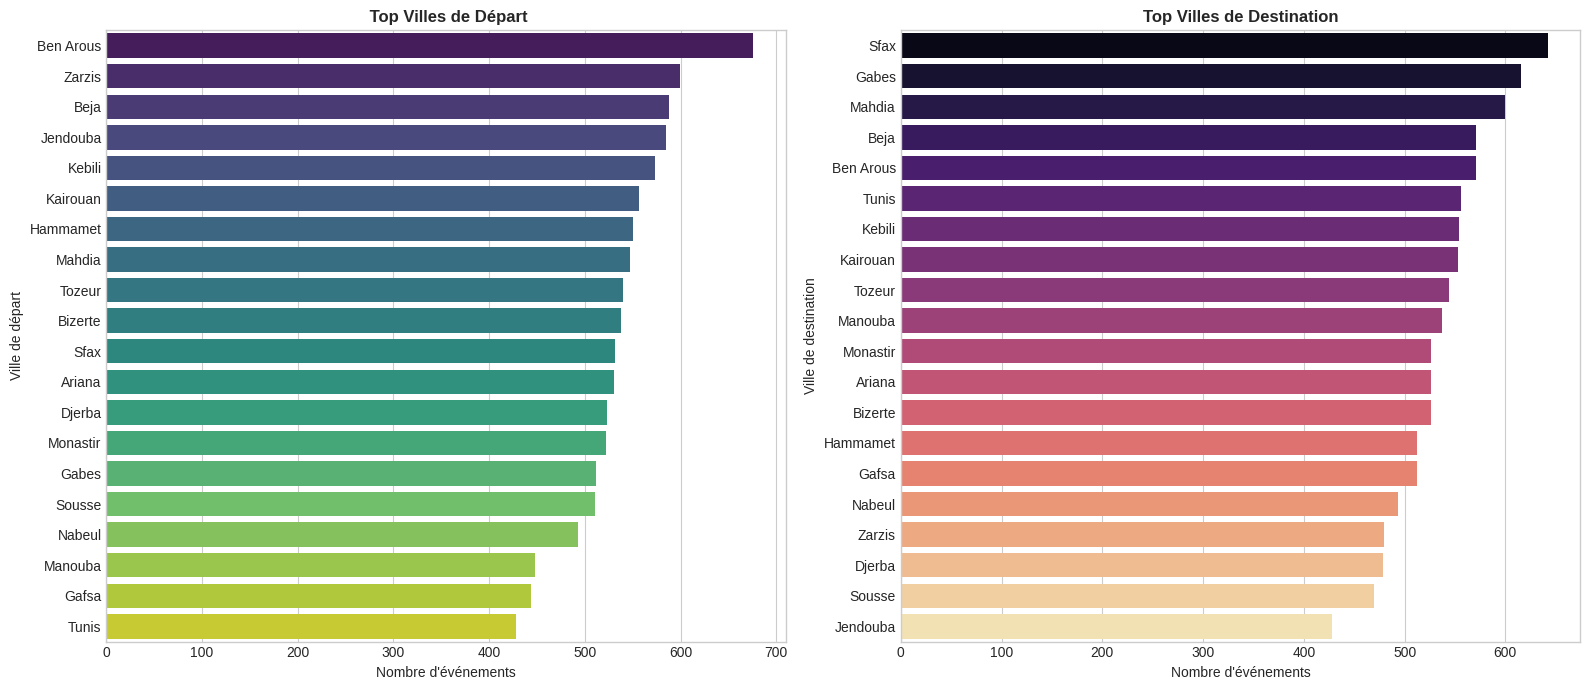

In [220]:
# Visualisation des villes de départ et destination
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Villes de départ
sns.barplot(x=departure_counts.values, y=departure_counts.index, 
            palette='viridis', ax=axes[0])
axes[0].set_xlabel('Nombre d\'événements')
axes[0].set_ylabel('Ville de départ')
axes[0].set_title(' Top Villes de Départ', fontweight='bold')

# Villes de destination
sns.barplot(x=destination_counts.values, y=destination_counts.index, 
            palette='magma', ax=axes[1])
axes[1].set_xlabel('Nombre d\'événements')
axes[1].set_ylabel('Ville de destination')
axes[1].set_title('Top Villes de Destination', fontweight='bold')

plt.tight_layout()
plt.show()

In [221]:
print("📋 Distribution des statuts de réservation:")
reservation_status = df['reservation_status'].value_counts(dropna=False)
reservation_status

📋 Distribution des statuts de réservation:


reservation_status
active       7494
NaN          2600
cancelled     602
Name: count, dtype: int64

## 1.8 Analyse des Variables Numériques

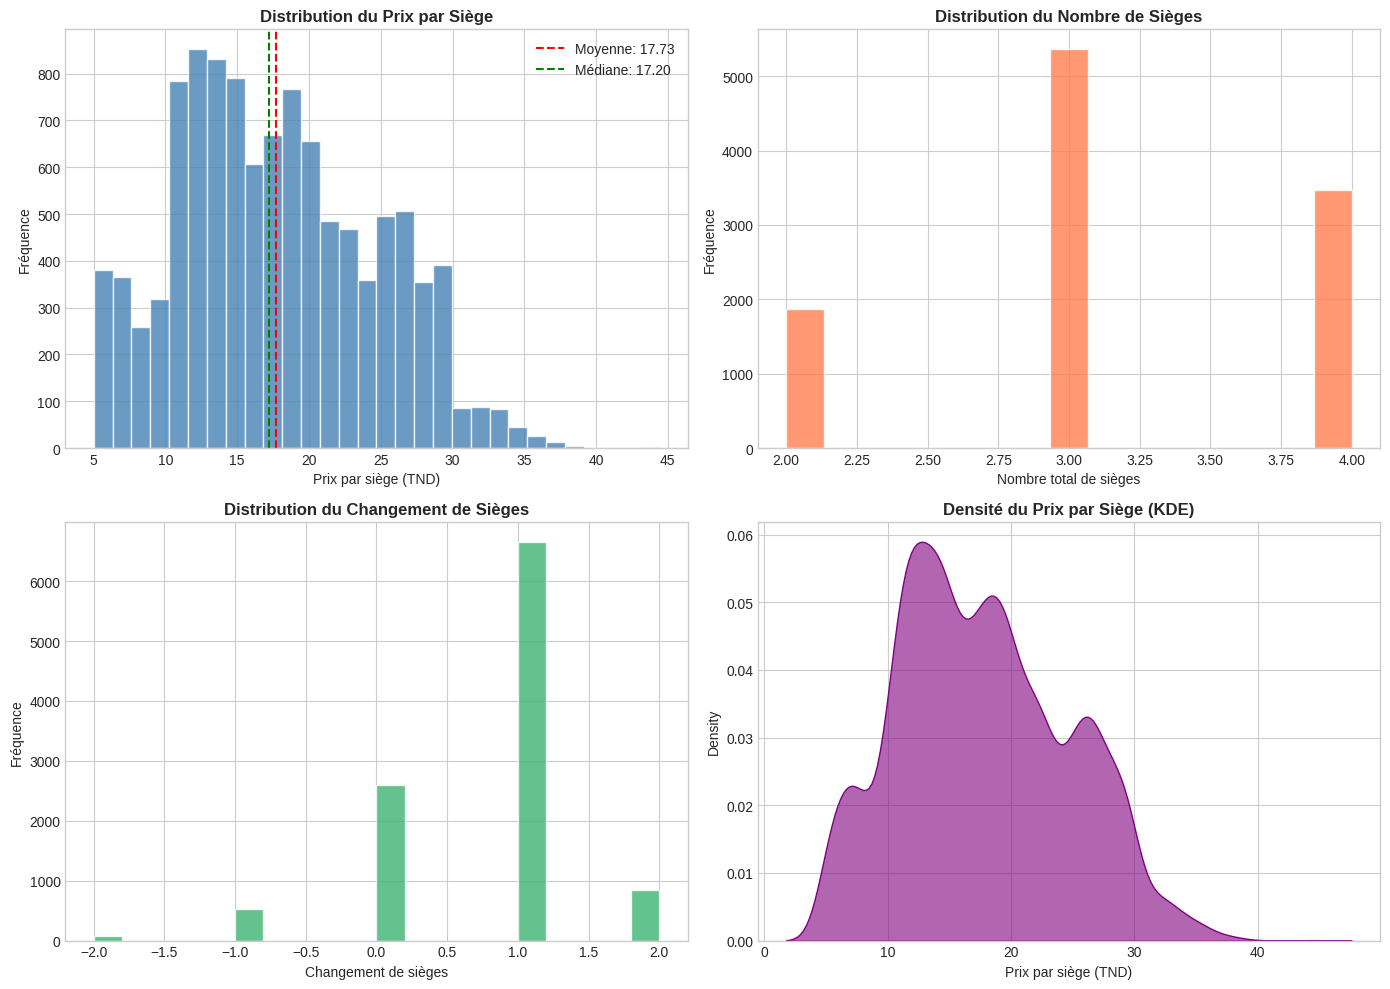

In [222]:
# Histogramme du prix par siège
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Prix par siège
axes[0, 0].hist(df['price_per_seat'].dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.8)
axes[0, 0].set_xlabel('Prix par siège (TND)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Distribution du Prix par Siège', fontweight='bold')
axes[0, 0].axvline(df['price_per_seat'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["price_per_seat"].mean():.2f}')
axes[0, 0].axvline(df['price_per_seat'].median(), color='green', linestyle='--', label=f'Médiane: {df["price_per_seat"].median():.2f}')
axes[0, 0].legend()

# Nombre total de sièges
axes[0, 1].hist(df['seats_total'].dropna(), bins=15, color='coral', edgecolor='white', alpha=0.8)
axes[0, 1].set_xlabel('Nombre total de sièges')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_title('Distribution du Nombre de Sièges', fontweight='bold')

# Changement de sièges
axes[1, 0].hist(df['seats_change'].dropna(), bins=20, color='mediumseagreen', edgecolor='white', alpha=0.8)
axes[1, 0].set_xlabel('Changement de sièges')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution du Changement de Sièges', fontweight='bold')

# KDE Plot du prix
sns.kdeplot(data=df, x='price_per_seat', fill=True, ax=axes[1, 1], color='purple', alpha=0.6)
axes[1, 1].set_xlabel('Prix par siège (TND)')
axes[1, 1].set_title('Densité du Prix par Siège (KDE)', fontweight='bold')

plt.tight_layout()
plt.show()

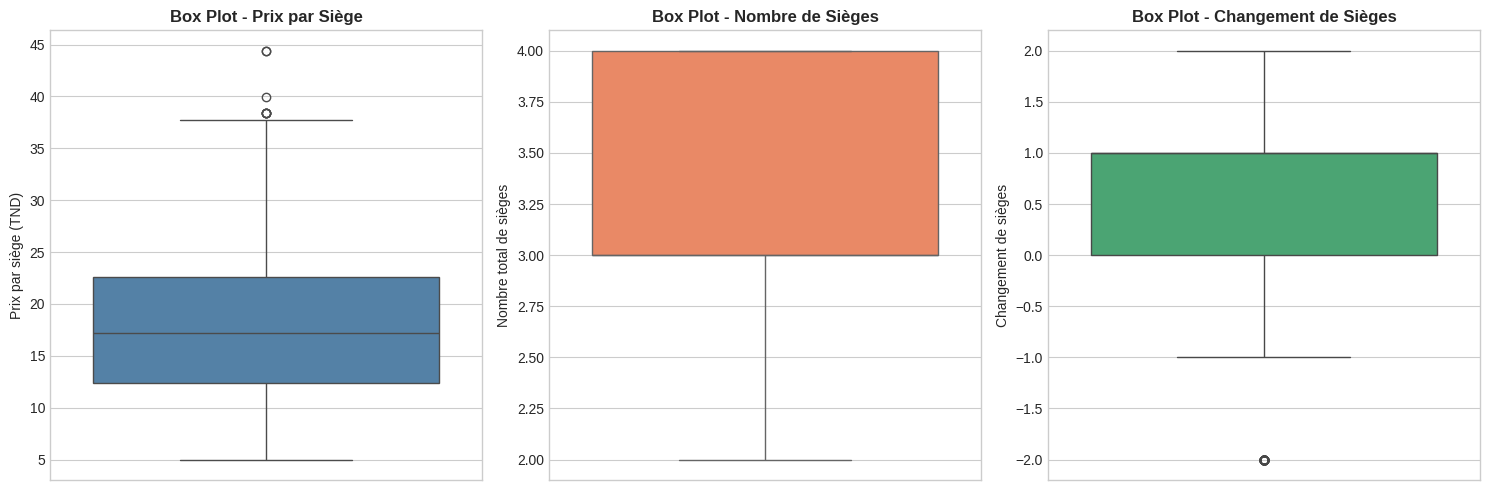

In [223]:
# Box plots pour les variables numériques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot prix par siège
sns.boxplot(y=df['price_per_seat'], ax=axes[0], color='steelblue')
axes[0].set_ylabel('Prix par siège (TND)')
axes[0].set_title('Box Plot - Prix par Siège', fontweight='bold')

# Box plot nombre de sièges
sns.boxplot(y=df['seats_total'], ax=axes[1], color='coral')
axes[1].set_ylabel('Nombre total de sièges')
axes[1].set_title('Box Plot - Nombre de Sièges', fontweight='bold')

# Box plot changement de sièges
sns.boxplot(y=df['seats_change'], ax=axes[2], color='mediumseagreen')
axes[2].set_ylabel('Changement de sièges')
axes[2].set_title('Box Plot - Changement de Sièges', fontweight='bold')

plt.tight_layout()
plt.show()

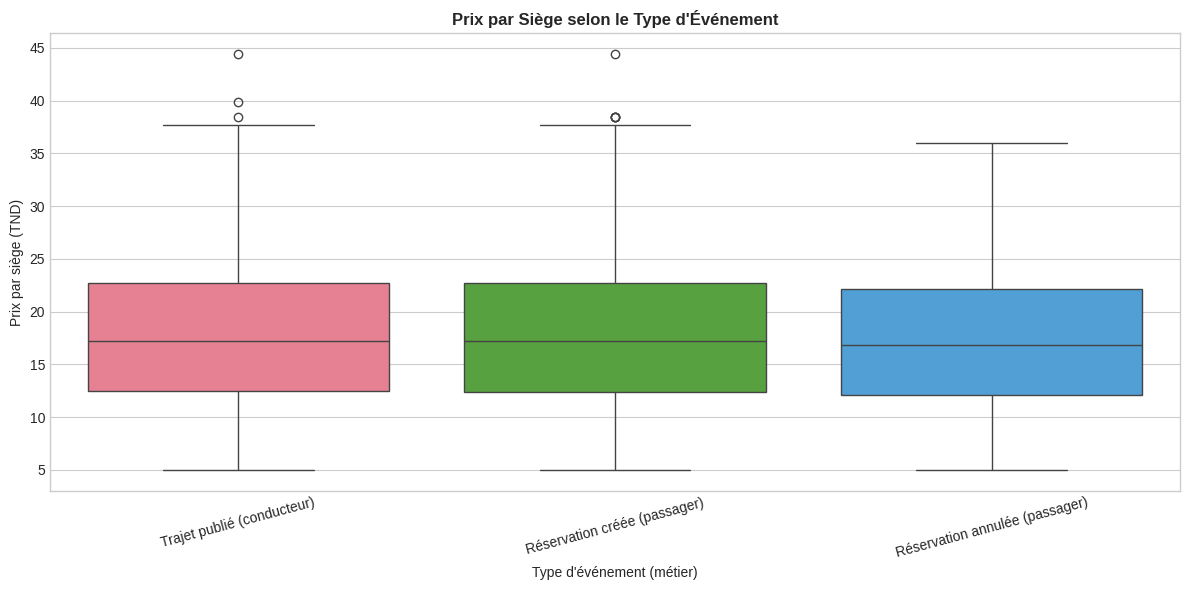

In [224]:
# Mapping des types d'événements vers des libellés métier
event_labels = {
    "trip_published": "Trajet publié (conducteur)",
    "reservation_created": "Réservation créée (passager)",
    "reservation_cancelled": "Réservation annulée (passager)"
}

# Ordre des événements tel qu'il apparaît dans les données
event_order = df["event_type"].dropna().unique()

# Labels métier correspondants (sans modifier df)
labels = [event_labels[e] for e in event_order]

# Box plot du prix par type d'événement
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="event_type",
    y="price_per_seat",
    order=event_order,
    palette="husl",
    ax=ax
)

# Remplacer les labels de l’axe X par les libellés métier
ax.set_xticklabels(labels, rotation=15)

ax.set_xlabel("Type d'événement (métier)")
ax.set_ylabel("Prix par siège (TND)")
ax.set_title("Prix par Siège selon le Type d'Événement", fontweight="bold")

plt.tight_layout()
plt.show()

## 1.9 Analyse Temporelle

In [225]:
# Conversion des colonnes temporelles
df['event_ts'] = pd.to_datetime(df['event_ts'])
df['trip_publish_ts'] = pd.to_datetime(df['trip_publish_ts'])
df['trip_departure_ts'] = pd.to_datetime(df['trip_departure_ts'])

# Extraction des composantes temporelles
df['event_date'] = df['event_ts'].dt.date
df['event_month'] = df['event_ts'].dt.month
df['event_month_name'] = df['event_ts'].dt.month_name()
df['event_day'] = df['event_ts'].dt.day
df['event_hour'] = df['event_ts'].dt.hour
df['event_dayofweek'] = df['event_ts'].dt.dayofweek
df['event_day_name'] = df['event_ts'].dt.day_name()
df['event_week'] = df['event_ts'].dt.isocalendar().week

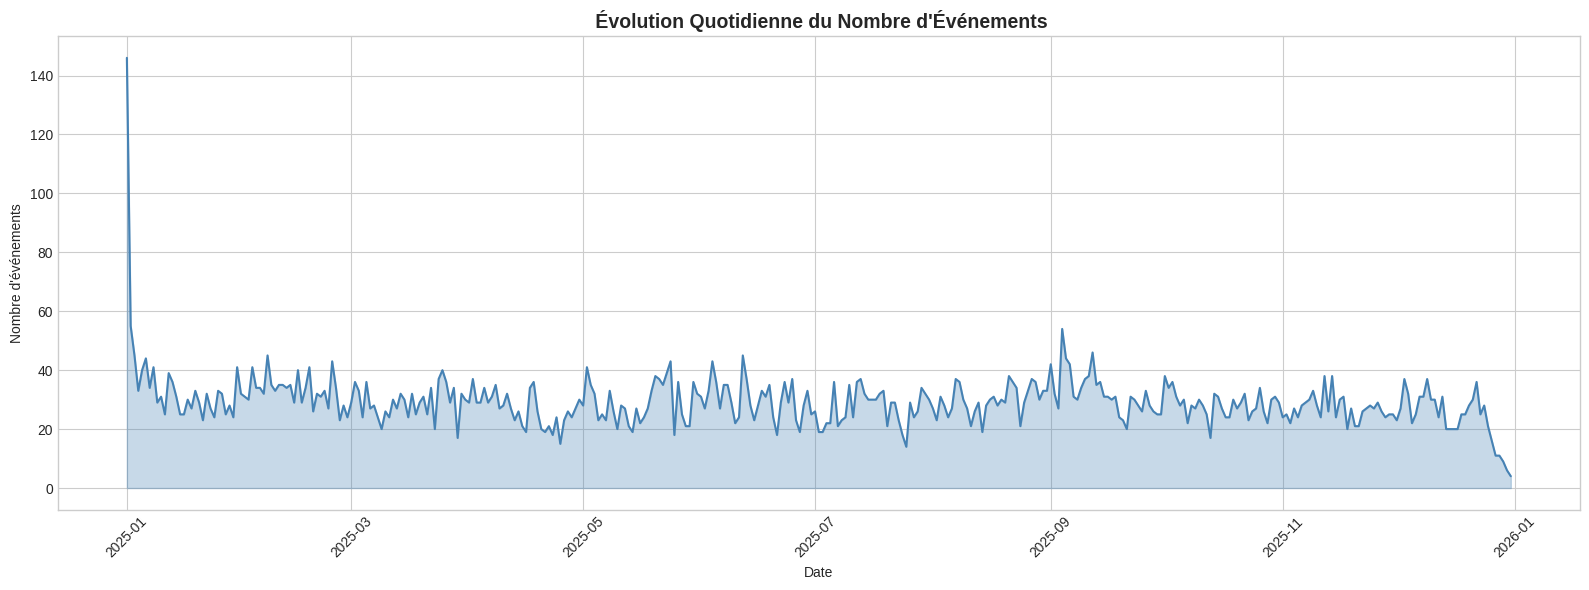

In [226]:
# Évolution quotidienne des événements
daily_events = df.groupby('event_date').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(daily_events['event_date'], daily_events['count'], color='steelblue', linewidth=1.5)
ax.fill_between(daily_events['event_date'], daily_events['count'], alpha=0.3, color='steelblue')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre d\'événements')
ax.set_title(' Évolution Quotidienne du Nombre d\'Événements', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

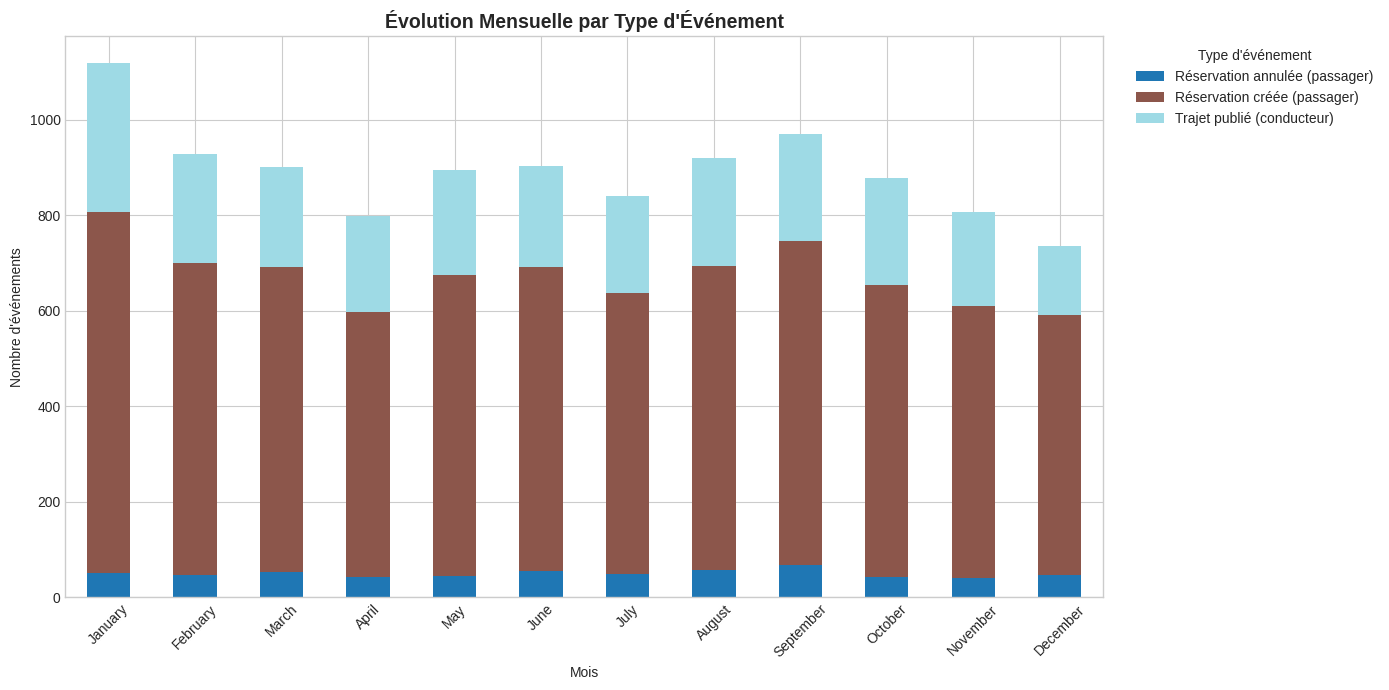

In [227]:
event_labels = {
    "trip_published": "Trajet publié (conducteur)",
    "reservation_created": "Réservation créée (passager)",
    "reservation_cancelled": "Réservation annulée (passager)"
}

# Évolution mensuelle par type d'événement
monthly_by_type = df.groupby(['event_month_name', 'event_type']).size().unstack(fill_value=0)

# Réordonner les mois
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_by_type = monthly_by_type.reindex([m for m in months_order if m in monthly_by_type.index])

# Renommer les colonnes (types d'événements) avec libellés métier
monthly_by_type = monthly_by_type.rename(columns=event_labels)

fig, ax = plt.subplots(figsize=(14, 7))

monthly_by_type.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_xlabel('Mois')
ax.set_ylabel("Nombre d'événements")
ax.set_title("Évolution Mensuelle par Type d'Événement", fontsize=14, fontweight='bold')

ax.legend(title="Type d'événement", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


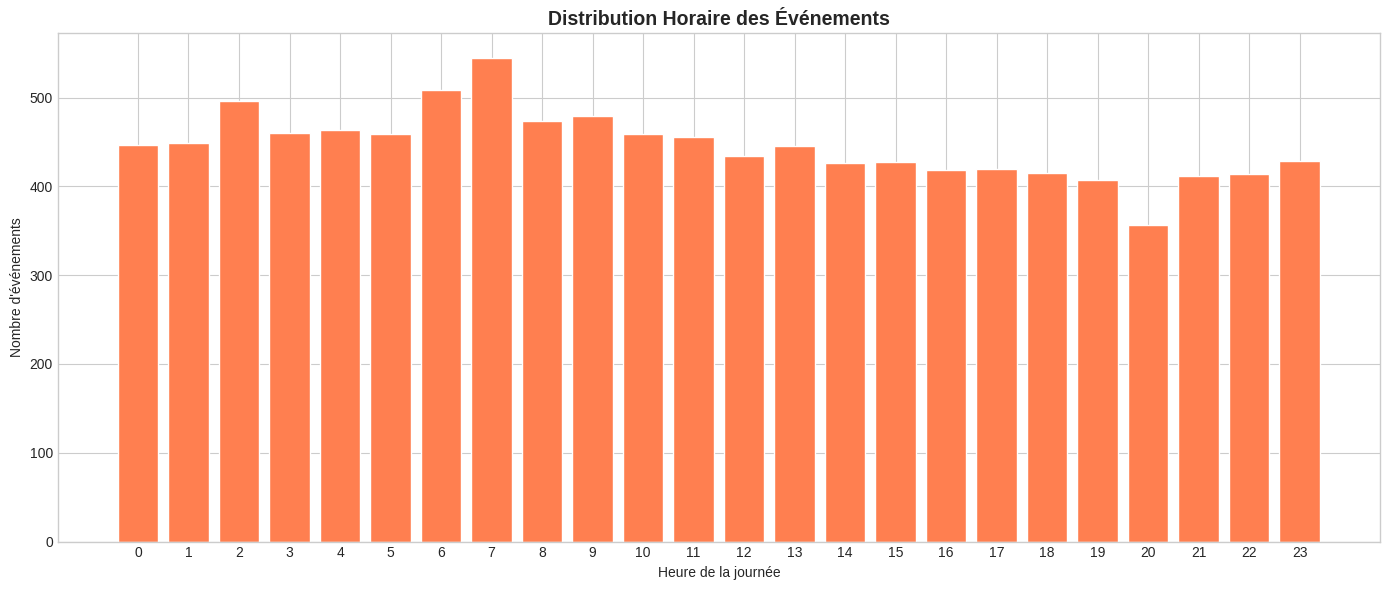

In [228]:
# Distribution horaire des événements
hourly_events = df.groupby('event_hour').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(hourly_events['event_hour'], hourly_events['count'], color='coral', edgecolor='white')
ax.set_xlabel('Heure de la journée')
ax.set_ylabel('Nombre d\'événements')
ax.set_title('Distribution Horaire des Événements', fontsize=14, fontweight='bold')
ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

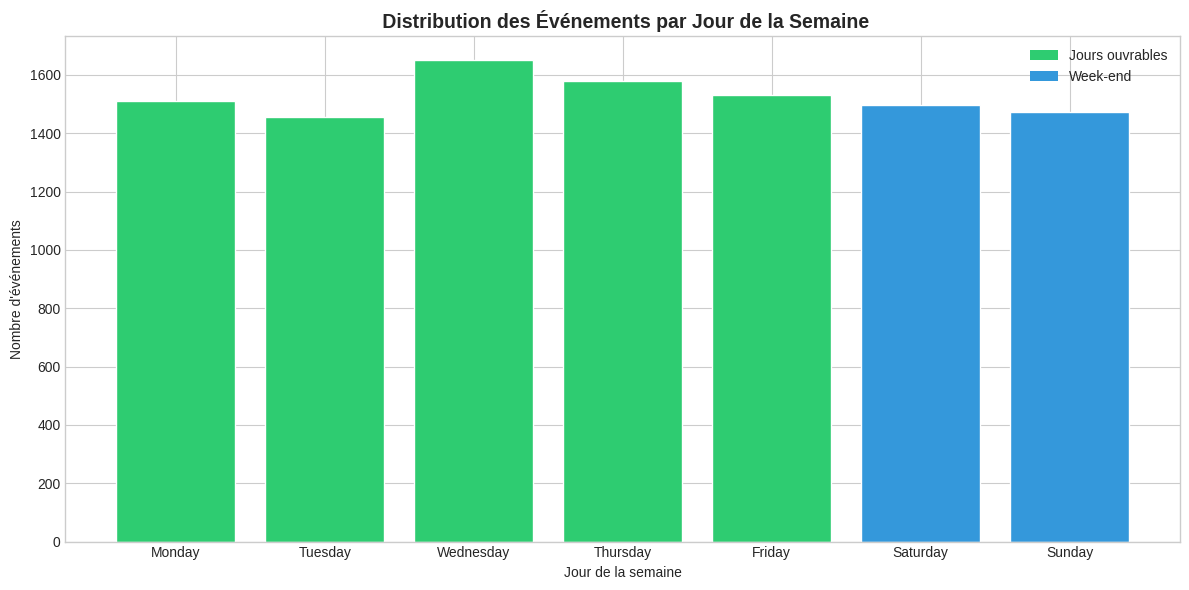

In [229]:
# Distribution par jour de la semaine
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_events = df.groupby('event_day_name').size().reindex(days_order).reset_index(name='count')

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#3498db' if day in ['Saturday', 'Sunday'] else '#2ecc71' for day in weekly_events['event_day_name']]
bars = ax.bar(weekly_events['event_day_name'], weekly_events['count'], color=colors, edgecolor='white')
ax.set_xlabel('Jour de la semaine')
ax.set_ylabel('Nombre d\'événements')
ax.set_title(' Distribution des Événements par Jour de la Semaine', fontsize=14, fontweight='bold')

# Légende
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='Jours ouvrables'),
                   Patch(facecolor='#3498db', label='Week-end')]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## 1.10 Analyse des Conducteurs et Passagers

In [230]:
top_drivers = df.groupby(['driver_id', 'driver_name']).size().reset_index(name='nb_events')
top_drivers = top_drivers.sort_values('nb_events', ascending=False).head(15)
print(" Top 15 Conducteurs les Plus Actifs:")

top_drivers

 Top 15 Conducteurs les Plus Actifs:


,driver_id,driver_name,nb_events
47,DRV0048,Ilyes Bouslama,255
38,DRV0039,Sami Guezguez,238
36,DRV0037,Aziz Guezguez,227
20,DRV0021,Sami Ben Ali,226
14,DRV0015,Asma Ben Ali,215
55,DRV0056,Ilyes Khelifi,212
5,DRV0006,Mouna Kouki m,211
9,DRV0010,Mehdi Ben Ali,211
42,DRV0043,Nour Ben Youssef,207
49,DRV0050,Wassim Dali,205


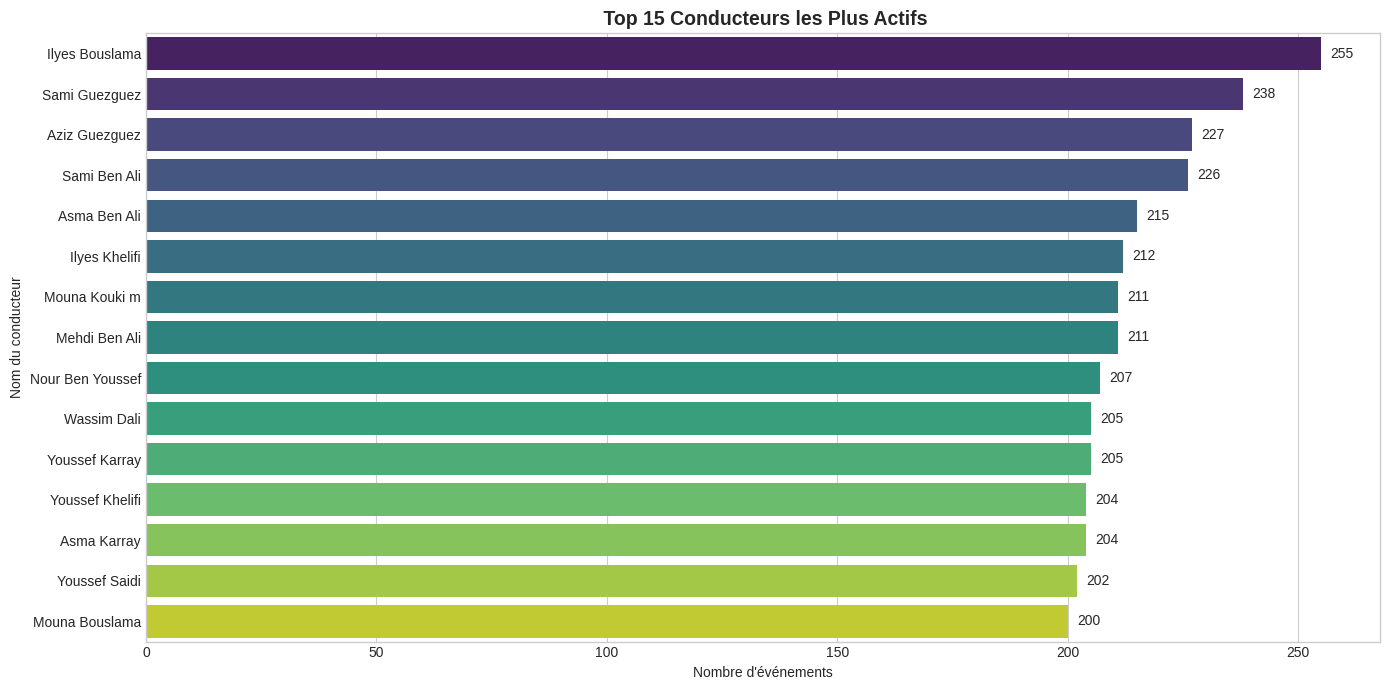

In [231]:
# Visualisation des top conducteurs
fig, ax = plt.subplots(figsize=(14, 7))

sns.barplot(data=top_drivers, x='nb_events', y='driver_name', palette='viridis', ax=ax)
ax.set_xlabel('Nombre d\'événements')
ax.set_ylabel('Nom du conducteur')
ax.set_title(' Top 15 Conducteurs les Plus Actifs', fontsize=14, fontweight='bold')

# Ajouter les valeurs
for i, v in enumerate(top_drivers['nb_events']):
    ax.text(v + 2, i, str(v), va='center')

plt.tight_layout()
plt.show()

In [232]:
passengers_df = df[df['passenger_id'].notna()]
top_passengers = passengers_df.groupby(['passenger_id', 'passenger_name']).size().reset_index(name='nb_reservations')
top_passengers = top_passengers.sort_values('nb_reservations', ascending=False).head(15)
print(" Top 15 Passagers les Plus Actifs:")
top_passengers

 Top 15 Passagers les Plus Actifs:


,passenger_id,passenger_name,nb_reservations
178,PAS0179,Youssef Dali,31
213,PAS0214,Eya Zouari,31
405,PAS0406,Nour Ferjani,30
432,PAS0433,Rim Gharbi,29
228,PAS0229,Eya Bouslama,28
321,PAS0322,Ameni Bouslama,27
315,PAS0316,Sarra Hammami,27
2,PAS0003,Ahmed Zouari,27
194,PAS0195,Skander Ben Youssef,27
243,PAS0244,Hedi Trabelsi,27


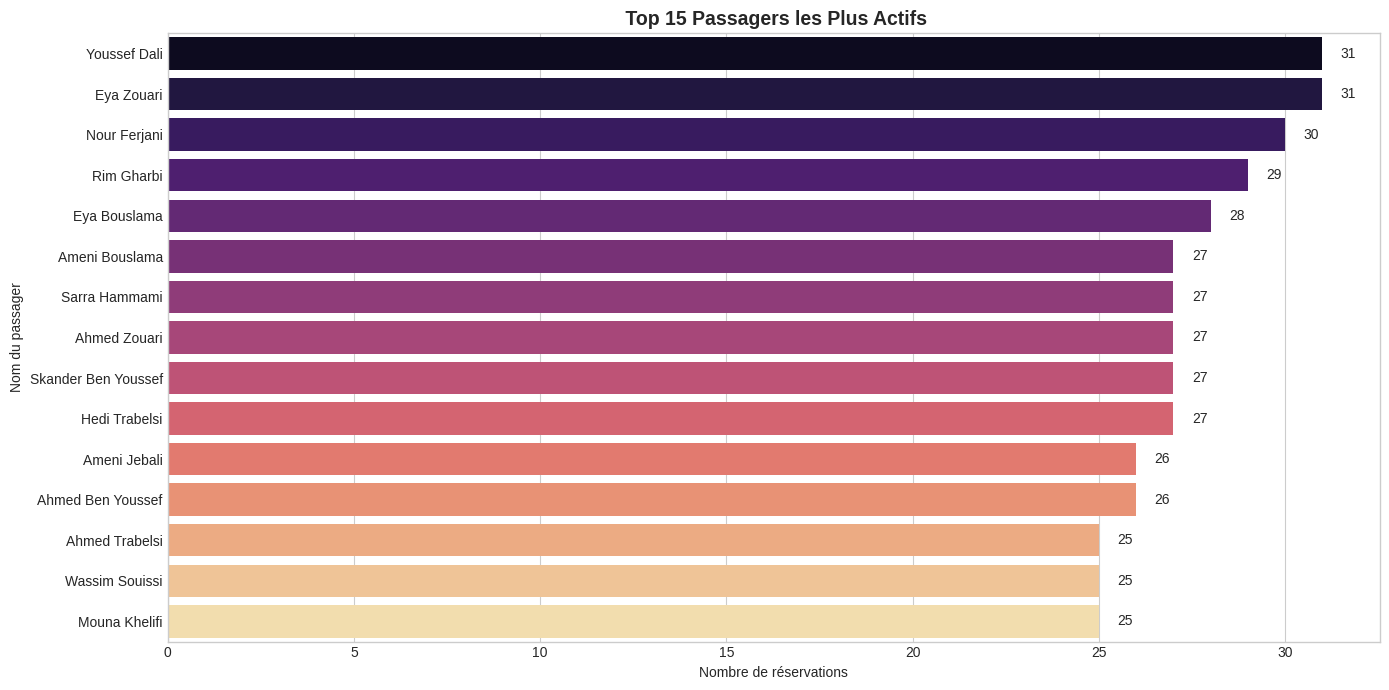

In [233]:
# Visualisation des top passagers
fig, ax = plt.subplots(figsize=(14, 7))

sns.barplot(data=top_passengers, x='nb_reservations', y='passenger_name', palette='magma', ax=ax)
ax.set_xlabel('Nombre de réservations')
ax.set_ylabel('Nom du passager')
ax.set_title(' Top 15 Passagers les Plus Actifs', fontsize=14, fontweight='bold')

# Ajouter les valeurs
for i, v in enumerate(top_passengers['nb_reservations']):
    ax.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()

## 1.11 Analyse des Trajets Populaires

In [234]:

df['route'] = df['departure_city'] + ' → ' + df['destination_city']
top_routes = df.groupby('route').size().reset_index(name='count').sort_values('count', ascending=False).head(20)

print(" Top 20 Routes les Plus Populaires:")

top_routes

 Top 20 Routes les Plus Populaires:


,route,count
61,Bizerte → Gabes,62
363,Zarzis → Bizerte,61
46,Ben Arous → Kairouan,60
194,Kebili → Gabes,60
264,Monastir → Zarzis,59
10,Ariana → Mahdia,58
213,Mahdia → Gabes,55
53,Ben Arous → Sousse,54
177,Kairouan → Hammamet,54
332,Tozeur → Kebili,52


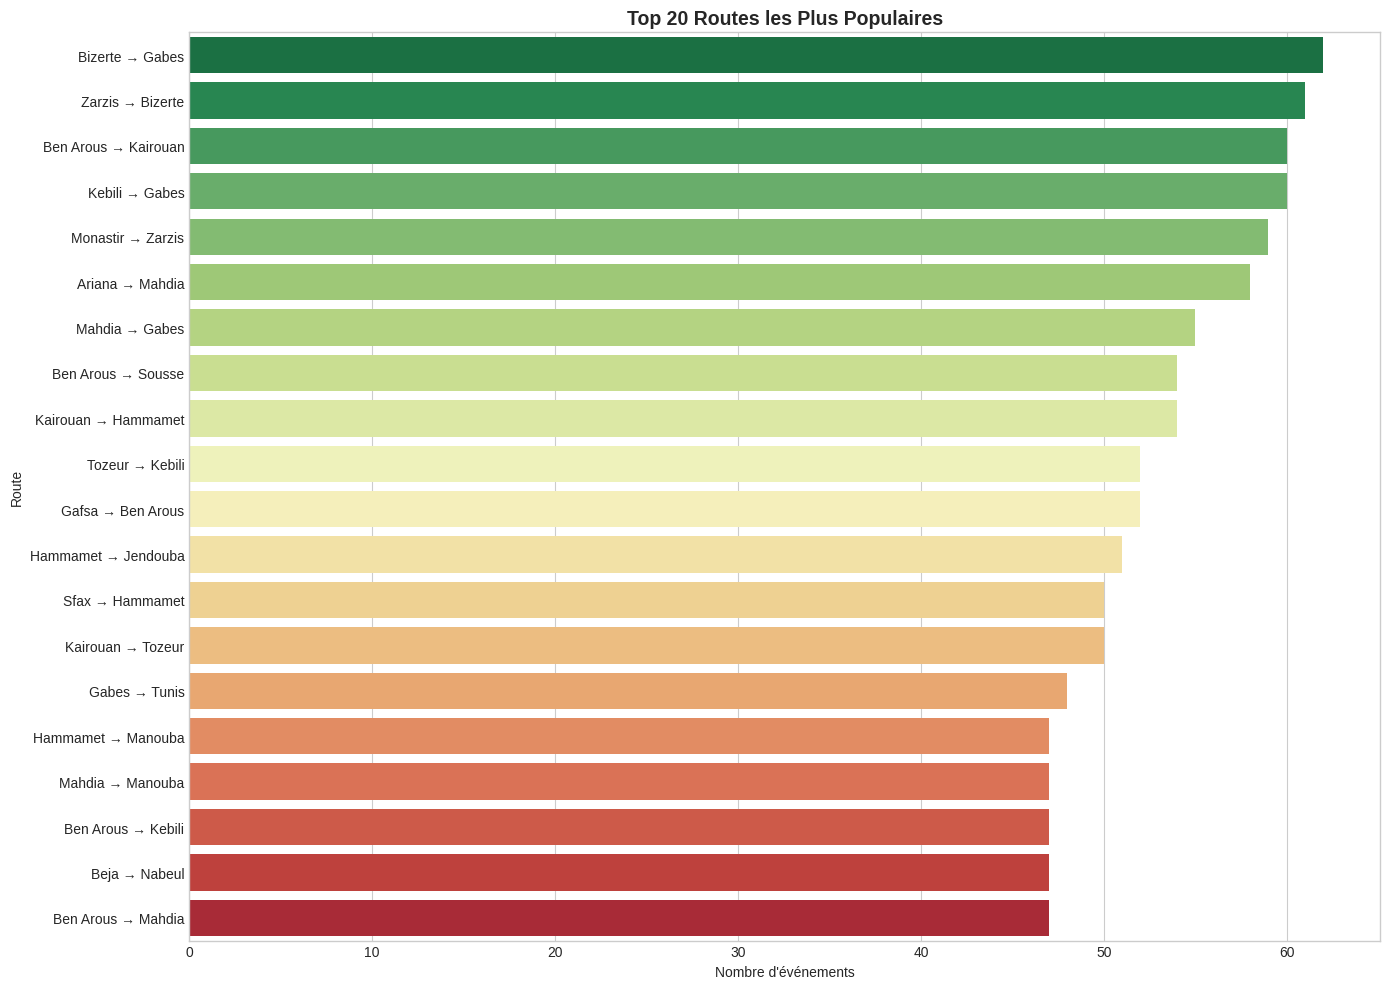

In [235]:
# Visualisation des top routes
fig, ax = plt.subplots(figsize=(14, 10))

sns.barplot(data=top_routes, x='count', y='route', palette='RdYlGn_r', ax=ax)
ax.set_xlabel('Nombre d\'événements')
ax.set_ylabel('Route')
ax.set_title('Top 20 Routes les Plus Populaires', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

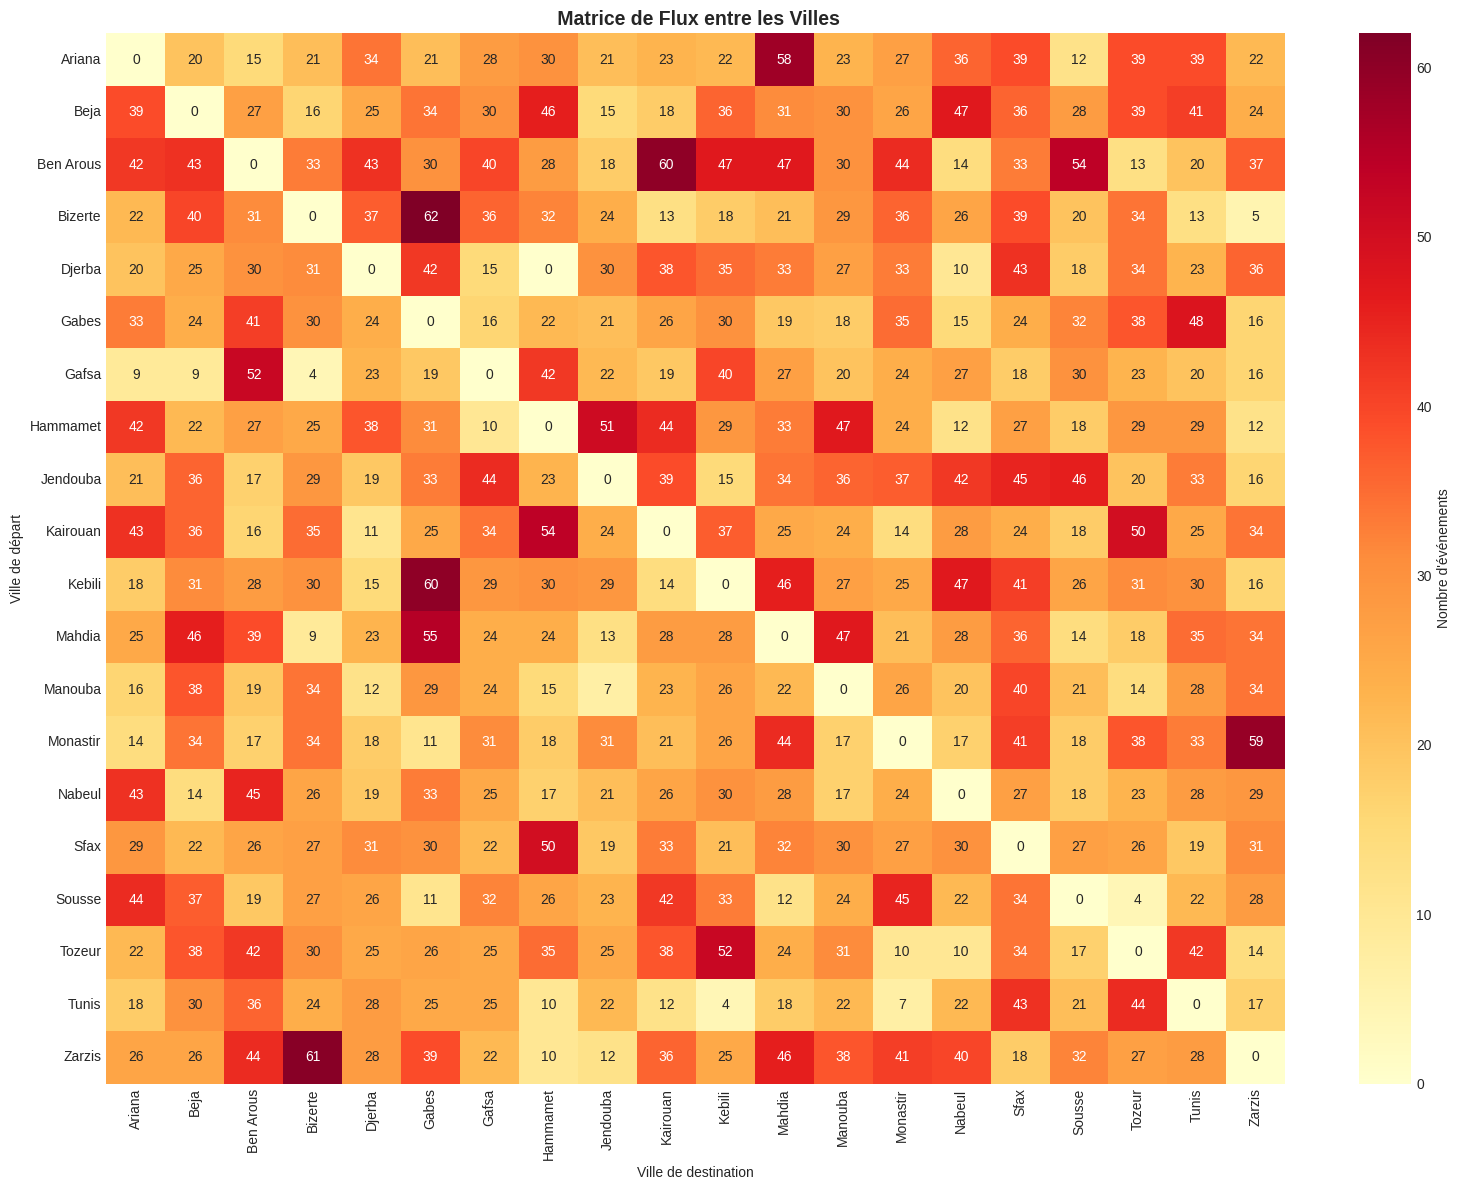

In [236]:
# Matrice de flux entre villes 
route_matrix = df.groupby(['departure_city', 'destination_city']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(route_matrix, annot=True, fmt='d', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Nombre d\'événements'})
ax.set_xlabel('Ville de destination')
ax.set_ylabel('Ville de départ')
ax.set_title(' Matrice de Flux entre les Villes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 1.12 Analyse des Prix par Ville

In [237]:
# Prix moyen par ville de départ
price_by_departure = df.groupby('departure_city')['price_per_seat'].agg(['mean', 'median', 'min', 'max', 'count']).round(2)
price_by_departure = price_by_departure.sort_values('mean', ascending=False)

print(" Prix Moyen par Ville de Départ:")

price_by_departure

 Prix Moyen par Ville de Départ:


,mean,median,min,max,count
departure_city,,,,,
Zarzis,21.43,21.30,5.0,39.9,599
Gafsa,20.26,22.70,5.0,30.0,444
Ariana,19.97,19.10,5.0,44.4,530
Manouba,19.43,19.90,5.0,38.4,448
Djerba,19.37,19.60,5.0,35.4,523
Gabes,19.28,17.40,5.5,29.8,512
Ben Arous,19.20,19.05,5.0,35.1,676
Kebili,18.40,17.60,6.8,37.3,573
Mahdia,17.99,17.70,5.9,32.5,547


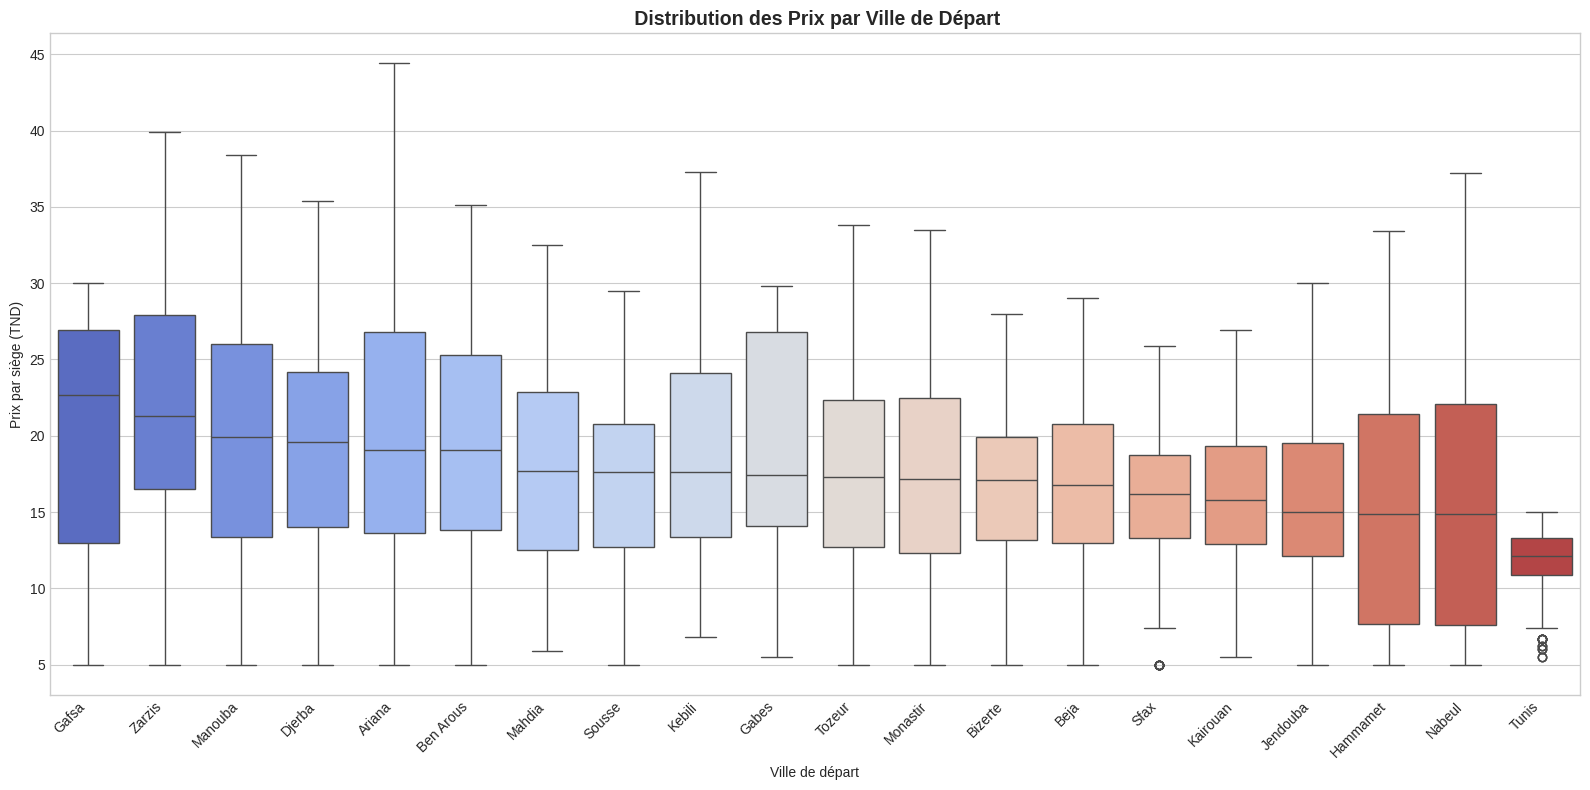

In [238]:
# Box plot des prix par ville de départ
fig, ax = plt.subplots(figsize=(16, 8))

# Ordonner par prix médian
order = df.groupby('departure_city')['price_per_seat'].median().sort_values(ascending=False).index

sns.boxplot(data=df, x='departure_city', y='price_per_seat', order=order, palette='coolwarm', ax=ax)
ax.set_xlabel('Ville de départ')
ax.set_ylabel('Prix par siège (TND)')
ax.set_title(' Distribution des Prix par Ville de Départ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 1.13 Analyse des Réservations

In [239]:
# Filtrer uniquement les événements de réservation
reservations_df = df[df['event_type'].isin(['reservation_created', 'reservation_cancelled'])]

print(" Statistiques des Réservations:")

print(f"   - Total réservations créées: {(df['event_type'] == 'reservation_created').sum():,}")
print(f"   - Total réservations annulées: {(df['event_type'] == 'reservation_cancelled').sum():,}")
print(f"   - Taux d'annulation: {(df['event_type'] == 'reservation_cancelled').sum() / (df['event_type'] == 'reservation_created').sum() * 100:.2f}%")

 Statistiques des Réservations:
   - Total réservations créées: 7,494
   - Total réservations annulées: 602
   - Taux d'annulation: 8.03%


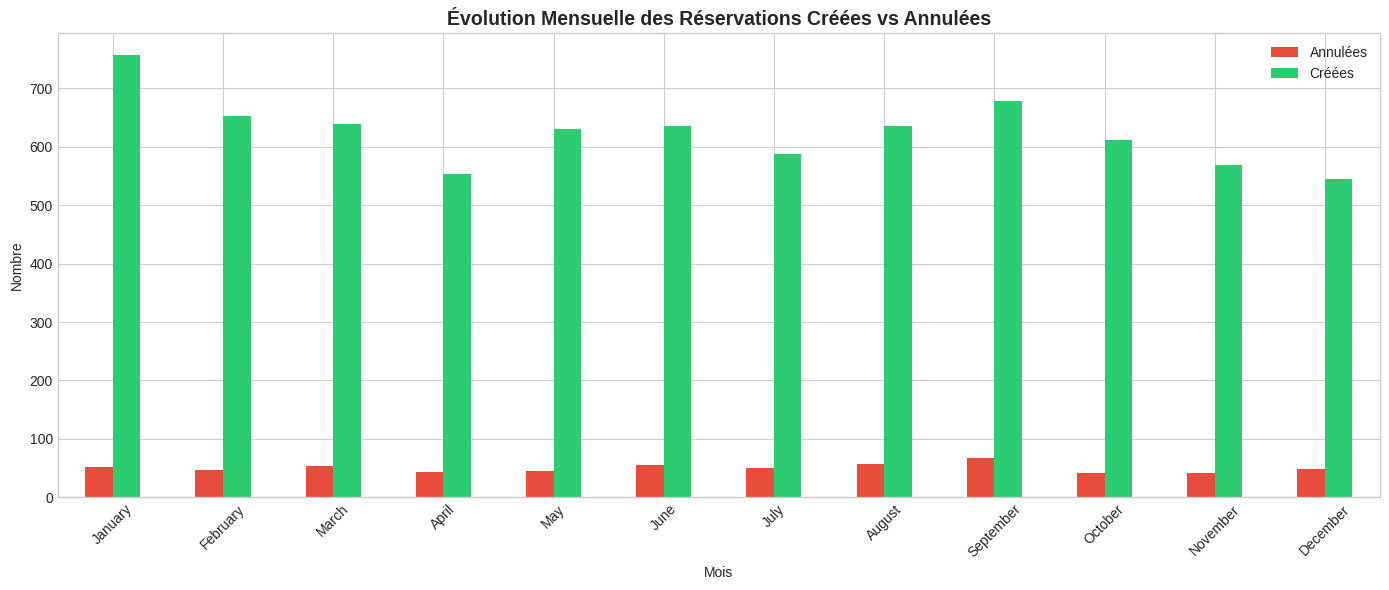

In [240]:
# Évolution mensuelle des réservations
monthly_reservations = df[df['event_type'].isin(['reservation_created', 'reservation_cancelled'])]
monthly_res_pivot = monthly_reservations.groupby(['event_month_name', 'event_type']).size().unstack(fill_value=0)

# Réordonner les mois
monthly_res_pivot = monthly_res_pivot.reindex([m for m in months_order if m in monthly_res_pivot.index])

fig, ax = plt.subplots(figsize=(14, 6))
monthly_res_pivot.plot(kind='bar', ax=ax, color=['#e74c3c', '#2ecc71'])
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre')
ax.set_title('Évolution Mensuelle des Réservations Créées vs Annulées', fontsize=14, fontweight='bold')
ax.legend(['Annulées', 'Créées'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

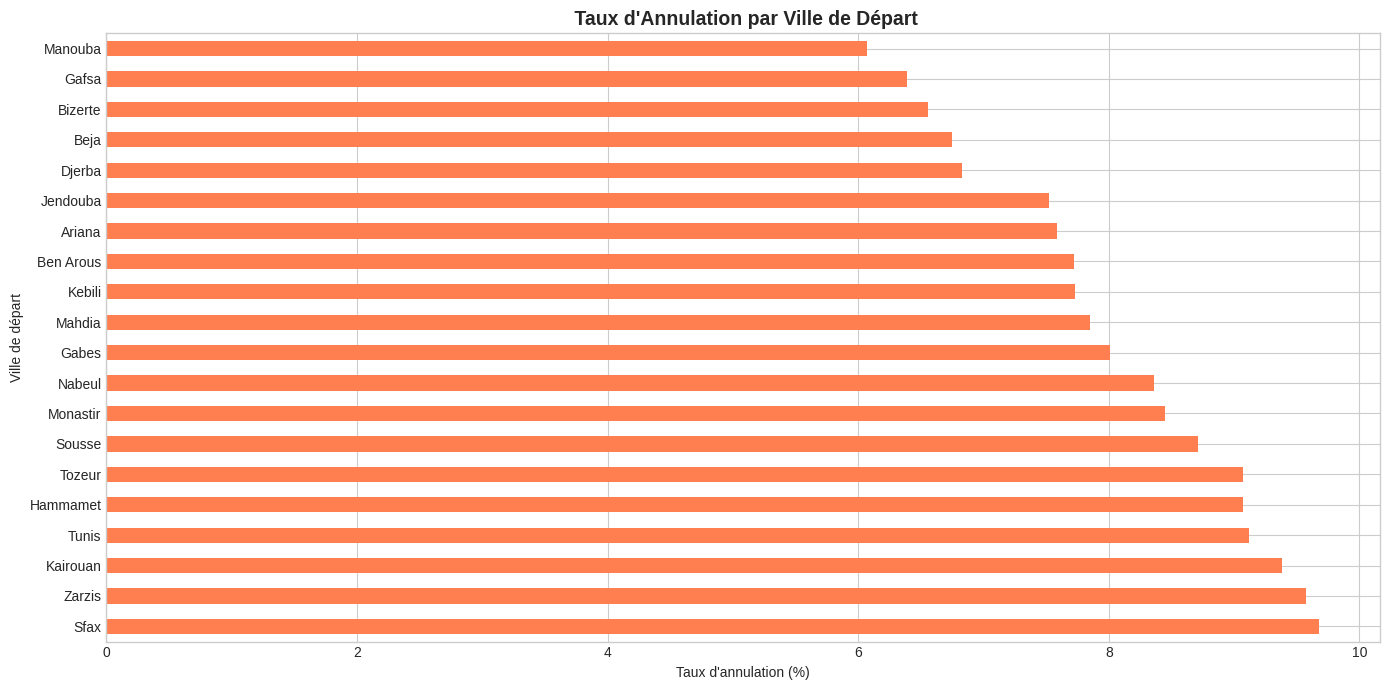

In [241]:
# Taux d'annulation par ville de départ
cancel_rate_by_city = df.groupby('departure_city').apply(
    lambda x: (x['event_type'] == 'reservation_cancelled').sum() / 
              max((x['event_type'] == 'reservation_created').sum(), 1) * 100
).sort_values(ascending=False).round(2)

fig, ax = plt.subplots(figsize=(14, 7))
cancel_rate_by_city.plot(kind='barh', color='coral', ax=ax)
ax.set_xlabel('Taux d\'annulation (%)')
ax.set_ylabel('Ville de départ')
ax.set_title(' Taux d\'Annulation par Ville de Départ', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---

# 📁 PARTIE 2 : Processus ETL (Extract, Transform, Load)

Dans cette partie, nous allons nettoyer, transformer et préparer les données pour le Data Warehouse et Power BI.

## Étapes du processus ETL :
1. **Traitement des valeurs manquantes** - Remplacer les NULL par des valeurs significatives
2. **Transformation des dates** - Création des colonnes temporelles (année, mois, jour, heure, trimestre)
3. **Normalisation des données** - Standardisation des noms et formats
4. **Détection des outliers** - Identification et traitement des valeurs aberrantes
5. **Transformation en catégories** - Conversion des colonnes en variables catégorielles
6. **Création de Pivot Tables** - Agrégations pour l'analyse BI
7. **Sauvegarde des données** - Export vers le dossier processed

## 2.1 Rechargement des Données Brutes

On recharge les données brutes pour commencer le processus ETL avec un dataset propre.

In [118]:
df_etl = pd.read_csv('data/raw/smartride_events_2025.csv')

## 2.2 Traitement des Valeurs Manquantes (NULL)

Les valeurs manquantes dans certaines colonnes sont normales car :
- **passenger_id, passenger_name** : Vides pour les événements `trip_published` (pas encore de passager)
- **reservation_id, reservation_status** : Vides pour les trajets sans réservation

Nous allons remplacer ces NULL par des valeurs significatives pour l'analyse BI.

In [119]:
print(df_etl.isnull().sum())
print(f"\nTotal de valeurs NULL: {df_etl.isnull().sum().sum():,}")

event_id                 0
event_type               0
event_ts                 0
trip_id                  0
trip_publish_ts          0
trip_departure_ts        0
departure_city           0
destination_city         0
driver_id                0
driver_name              0
passenger_id          2600
passenger_name        2600
price_per_seat           0
seats_total              0
seats_change             0
reservation_id        2600
reservation_status    2600
dtype: int64

Total de valeurs NULL: 10,400


In [120]:
# Pour les colonnes liées aux passagers (NULL = pas de réservation)
df_etl['passenger_id'] = df_etl['passenger_id'].fillna('PAS_AUCUN')
df_etl['passenger_name'] = df_etl['passenger_name'].fillna('Pas de passager')

# Pour les colonnes liées aux réservations
df_etl['reservation_id'] = df_etl['reservation_id'].fillna('RSV_AUCUNE')
df_etl['reservation_status'] = df_etl['reservation_status'].fillna('sans_reservation')



In [121]:
print(df_etl.isnull().sum())
print(f"\nTotal de valeurs NULL: {df_etl.isnull().sum().sum()}")

event_id              0
event_type            0
event_ts              0
trip_id               0
trip_publish_ts       0
trip_departure_ts     0
departure_city        0
destination_city      0
driver_id             0
driver_name           0
passenger_id          0
passenger_name        0
price_per_seat        0
seats_total           0
seats_change          0
reservation_id        0
reservation_status    0
dtype: int64

Total de valeurs NULL: 0


## 2.3 Transformation des Dates et Création des Colonnes Temporelles

Conversion des colonnes de dates en format datetime et extraction des composantes temporelles pour l'analyse BI.

In [122]:
df_etl['event_ts'] = pd.to_datetime(df_etl['event_ts'])
df_etl['trip_publish_ts'] = pd.to_datetime(df_etl['trip_publish_ts'])
df_etl['trip_departure_ts'] = pd.to_datetime(df_etl['trip_departure_ts'])

In [123]:
# Année, Mois, Jour, Heure
df_etl['annee'] = df_etl['event_ts'].dt.year
df_etl['mois'] = df_etl['event_ts'].dt.month
df_etl['jour'] = df_etl['event_ts'].dt.day
df_etl['heure'] = df_etl['event_ts'].dt.hour

# Trimestre (Q1, Q2, Q3, Q4)
df_etl['trimestre'] = df_etl['event_ts'].dt.quarter
df_etl['trimestre_label'] = 'T' + df_etl['trimestre'].astype(str)

# Nom du mois et jour de la semaine
df_etl['mois_nom'] = df_etl['event_ts'].dt.month_name()
df_etl['jour_semaine'] = df_etl['event_ts'].dt.day_name()
df_etl['jour_semaine_num'] = df_etl['event_ts'].dt.dayofweek  # 0=Lundi, 6=Dimanche

# Semaine de l'année
df_etl['semaine'] = df_etl['event_ts'].dt.isocalendar().week

# Date seule (sans heure)
df_etl['date'] = df_etl['event_ts'].dt.date

# Période de la journée
def periode_journee(heure):
    if 6 <= heure < 12:
        return 'Matin'
    elif 12 <= heure < 14:
        return 'Midi'
    elif 14 <= heure < 18:
        return 'Après-midi'
    elif 18 <= heure < 22:
        return 'Soir'
    else:
        return 'Nuit'

df_etl['periode_journee'] = df_etl['heure'].apply(periode_journee)

In [124]:
# Vérification des nouvelles colonnes temporelles
df_etl[['event_ts', 'annee', 'mois', 'jour', 'heure', 'trimestre', 'trimestre_label', 
        'mois_nom', 'jour_semaine', 'periode_journee']].head(10)

,event_ts,annee,mois,jour,heure,trimestre,trimestre_label,mois_nom,jour_semaine,periode_journee
0,2025-01-01 00:00:00,2025,1,1,0,1,T1,January,Wednesday,Nuit
1,2025-01-01 00:00:00,2025,1,1,0,1,T1,January,Wednesday,Nuit
2,2025-01-01 00:00:00,2025,1,1,0,1,T1,January,Wednesday,Nuit
3,2025-01-01 00:00:00,2025,1,1,0,1,T1,January,Wednesday,Nuit
4,2025-01-01 00:00:00,2025,1,1,0,1,T1,January,Wednesday,Nuit
5,2025-01-01 00:00:00,2025,1,1,0,1,T1,January,Wednesday,Nuit
6,2025-01-01 00:04:11,2025,1,1,0,1,T1,January,Wednesday,Nuit
7,2025-01-01 00:06:15,2025,1,1,0,1,T1,January,Wednesday,Nuit
8,2025-01-01 00:06:59,2025,1,1,0,1,T1,January,Wednesday,Nuit
9,2025-01-01 00:20:25,2025,1,1,0,1,T1,January,Wednesday,Nuit


## 2.4 Normalisation des Données

Standardisation des noms (majuscules) et des formats pour assurer la cohérence des données.

In [125]:
# Noms des conducteurs
df_etl['driver_name_normalized'] = df_etl['driver_name'].str.upper()

# Noms des passagers
df_etl['passenger_name_normalized'] = df_etl['passenger_name'].str.upper()

# Villes de départ et destination
df_etl['departure_city_normalized'] = df_etl['departure_city'].str.upper()
df_etl['destination_city_normalized'] = df_etl['destination_city'].str.upper()

# Création de la route normalisée
df_etl['route'] = df_etl['departure_city'] + ' → ' + df_etl['destination_city']
df_etl['route_normalized'] = df_etl['departure_city_normalized'] + ' → ' + df_etl['destination_city_normalized']

In [126]:
# Vérification des colonnes normalisées
df_etl[['driver_name', 'driver_name_normalized', 'departure_city', 'departure_city_normalized']].head(5)

,driver_name,driver_name_normalized,departure_city,departure_city_normalized
0,Rim Karray,RIM KARRAY,Hammamet,HAMMAMET
1,Ilyes Dali,ILYES DALI,Manouba,MANOUBA
2,Wassim Mansouri,WASSIM MANSOURI,Ariana,ARIANA
3,Mariem Bouslama,MARIEM BOUSLAMA,Jendouba,JENDOUBA
4,Mariem Trabelsi,MARIEM TRABELSI,Kebili,KEBILI


## 2.5 Détection et Traitement des Outliers (Valeurs Aberrantes)

Identification des valeurs aberrantes dans les variables numériques à l'aide de la méthode IQR (Interquartile Range).

In [127]:
# Fonction pour détecter les outliers avec la méthode IQR
def detect_outliers_iqr(df, column):
    """
    Détecte les outliers en utilisant la méthode IQR
    Outliers = valeurs < Q1 - 1.5*IQR ou > Q3 + 1.5*IQR
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'nb_outliers': len(outliers),
        'pct_outliers': len(outliers) / len(df) * 100
    }

# Variables numériques à analyser
numeric_columns = ['price_per_seat', 'seats_total', 'seats_change']


outliers_summary = []
for col in numeric_columns:
    result = detect_outliers_iqr(df_etl, col)
    outliers_summary.append(result)
    print(f"\n {col}:")
    print(f"   • Q1: {result['Q1']:.2f}, Q3: {result['Q3']:.2f}, IQR: {result['IQR']:.2f}")
    print(f"   • Bornes: [{result['lower_bound']:.2f}, {result['upper_bound']:.2f}]")
    print(f"   • Outliers: {result['nb_outliers']:,} ({result['pct_outliers']:.2f}%)")

# Créer un DataFrame résumé
outliers_df = pd.DataFrame(outliers_summary)
outliers_df


 price_per_seat:
   • Q1: 12.40, Q3: 22.60, IQR: 10.20
   • Bornes: [-2.90, 37.90]
   • Outliers: 8 (0.07%)

 seats_total:
   • Q1: 3.00, Q3: 4.00, IQR: 1.00
   • Bornes: [1.50, 5.50]
   • Outliers: 0 (0.00%)

 seats_change:
   • Q1: 0.00, Q3: 1.00, IQR: 1.00
   • Bornes: [-1.50, 2.50]
   • Outliers: 70 (0.65%)


,column,Q1,Q3,IQR,lower_bound,upper_bound,nb_outliers,pct_outliers
0,price_per_seat,12.4,22.6,10.2,-2.9,37.9,8,0.074794
1,seats_total,3.0,4.0,1.0,1.5,5.5,0,0.000000
2,seats_change,0.0,1.0,1.0,-1.5,2.5,70,0.654450


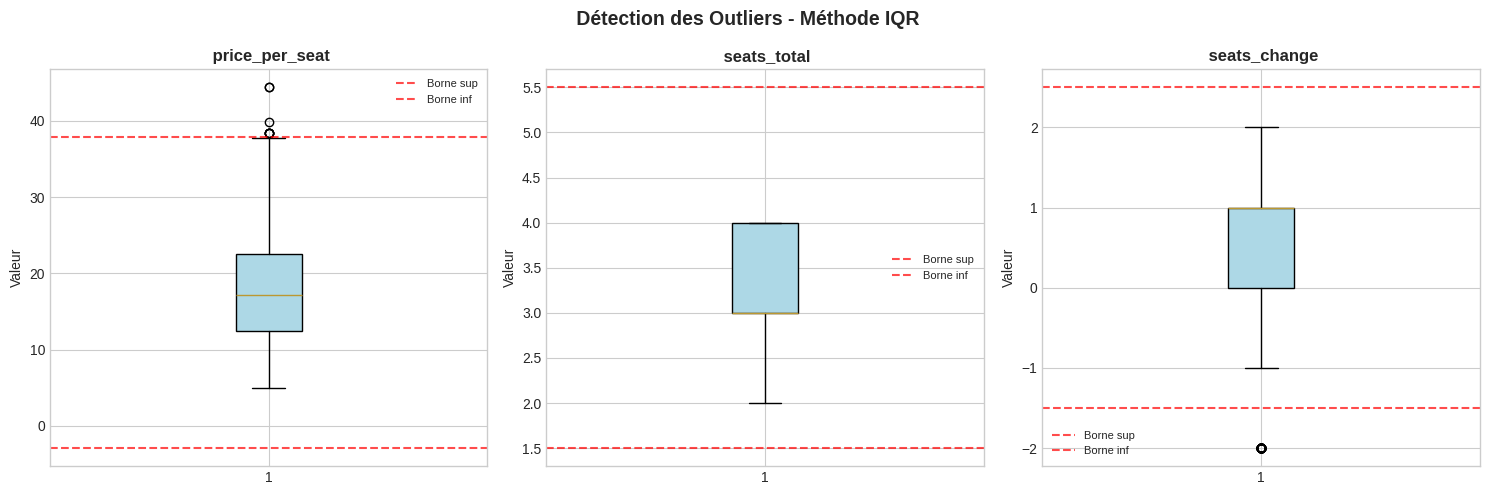

In [129]:
# Visualisation des outliers avec box plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_columns):
    # Box plot avec outliers en rouge
    bp = axes[i].boxplot(df_etl[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[i].set_title(f' {col}', fontweight='bold')
    axes[i].set_ylabel('Valeur')
    
    # Ajouter les statistiques
    result = outliers_summary[i]
    axes[i].axhline(y=result['upper_bound'], color='red', linestyle='--', alpha=0.7, label='Borne sup')
    axes[i].axhline(y=result['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Borne inf')
    axes[i].legend(fontsize=8)

plt.suptitle(' Détection des Outliers - Méthode IQR', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [130]:
# Création d'une colonne pour identifier les outliers de prix
Q1_price = df_etl['price_per_seat'].quantile(0.25)
Q3_price = df_etl['price_per_seat'].quantile(0.75)
IQR_price = Q3_price - Q1_price

df_etl['is_price_outlier'] = (
    (df_etl['price_per_seat'] < Q1_price - 1.5 * IQR_price) | 
    (df_etl['price_per_seat'] > Q3_price + 1.5 * IQR_price)
)

print(" Colonne 'is_price_outlier' créée")
print(f"   • Outliers identifiés: {df_etl['is_price_outlier'].sum():,}")
print(f"   • Non-outliers: {(~df_etl['is_price_outlier']).sum():,}")

 Colonne 'is_price_outlier' créée
   • Outliers identifiés: 8
   • Non-outliers: 10,688


## 2.6 Transformation en Variables Catégorielles

Conversion des colonnes pertinentes en variables catégorielles pour optimiser la mémoire et faciliter l'analyse.

In [131]:
# Colonnes à convertir en catégorielles
categorical_columns = [
    'event_type',
    'departure_city',
    'destination_city', 
    'reservation_status',
    'trimestre_label',
    'mois_nom',
    'jour_semaine',
    'periode_journee'
]




for col in categorical_columns:
    df_etl[col] = df_etl[col].astype('category')
    

In [132]:
# Création de catégories de prix
def categorize_price(price):
    if price <= 10:
        return 'Économique'
    elif price <= 20:
        return 'Standard'
    elif price <= 30:
        return 'Premium'
    else:
        return 'Luxe'

df_etl['price_category'] = df_etl['price_per_seat'].apply(categorize_price)
df_etl['price_category'] = df_etl['price_category'].astype('category')

print("Catégories de prix créées:")
print(df_etl['price_category'].value_counts())

Catégories de prix créées:
price_category
Standard      5743
Premium       3376
Économique    1239
Luxe           338
Name: count, dtype: int64


## 2.7 Création des Pivot Tables 

Tables agrégées préparées pour l'analyse décisionnelle dans Power BI.

In [133]:
# PIVOT TABLE 1: Événements par Mois et Type
pivot_events_monthly = pd.pivot_table(
    df_etl,
    values='event_id',
    index='mois_nom',
    columns='event_type',
    aggfunc='count',
    fill_value=0
)

# Réordonner les mois
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
pivot_events_monthly = pivot_events_monthly.reindex([m for m in months_order if m in pivot_events_monthly.index])
pivot_events_monthly

event_type,reservation_cancelled,reservation_created,trip_published
mois_nom,,,
January,52,756,311
February,47,653,228
March,53,639,209
April,43,554,202
May,45,630,220
June,55,636,212
July,50,588,202
August,58,635,228
September,68,678,224


In [134]:
# PIVOT TABLE 2: Statistiques de Prix par Ville de Départ
pivot_price_by_city = pd.pivot_table(
    df_etl,
    values='price_per_seat',
    index='departure_city',
    aggfunc=['count', 'mean', 'median', 'min', 'max', 'std']
).round(2)

pivot_price_by_city.columns = ['Nombre', 'Prix Moyen', 'Prix Médian', 'Prix Min', 'Prix Max', 'Écart-Type']
pivot_price_by_city = pivot_price_by_city.sort_values('Prix Moyen', ascending=False)
pivot_price_by_city

,Nombre,Prix Moyen,Prix Médian,Prix Min,Prix Max,Écart-Type
departure_city,,,,,,
Zarzis,599,21.43,21.30,5.0,39.9,7.76
Gafsa,444,20.26,22.70,5.0,30.0,7.58
Ariana,530,19.97,19.10,5.0,44.4,8.71
Manouba,448,19.43,19.90,5.0,38.4,7.73
Djerba,523,19.37,19.60,5.0,35.4,7.23
Gabes,512,19.28,17.40,5.5,29.8,7.19
Ben Arous,676,19.20,19.05,5.0,35.1,7.46
Kebili,573,18.40,17.60,6.8,37.3,6.49
Mahdia,547,17.99,17.70,5.9,32.5,6.35


In [135]:
# PIVOT TABLE 3: Activité par Trimestre et Type d'Événement
pivot_quarterly = pd.pivot_table(
    df_etl,
    values='event_id',
    index='trimestre_label',
    columns='event_type',
    aggfunc='count',
    fill_value=0
)

# Ajouter le total
pivot_quarterly['Total'] = pivot_quarterly.sum(axis=1)
pivot_quarterly

event_type,reservation_cancelled,reservation_created,trip_published,Total
trimestre_label,,,,
T1,152,2048,748,2948
T2,143,1820,634,2597
T3,176,1901,654,2731
T4,131,1725,564,2420


In [136]:
# PIVOT TABLE 4: Matrice Routes (Départ x Destination)
pivot_routes = pd.pivot_table(
    df_etl,
    values='event_id',
    index='departure_city',
    columns='destination_city',
    aggfunc='count',
    fill_value=0
)
pivot_routes

destination_city,Ariana,Beja,Ben Arous,Bizerte,Djerba,Gabes,Gafsa,Hammamet,Jendouba,Kairouan,Kebili,Mahdia,Manouba,Monastir,Nabeul,Sfax,Sousse,Tozeur,Tunis,Zarzis
departure_city,,,,,,,,,,,,,,,,,,,,
Ariana,0,20,15,21,34,21,28,30,21,23,22,58,23,27,36,39,12,39,39,22
Beja,39,0,27,16,25,34,30,46,15,18,36,31,30,26,47,36,28,39,41,24
Ben Arous,42,43,0,33,43,30,40,28,18,60,47,47,30,44,14,33,54,13,20,37
Bizerte,22,40,31,0,37,62,36,32,24,13,18,21,29,36,26,39,20,34,13,5
Djerba,20,25,30,31,0,42,15,0,30,38,35,33,27,33,10,43,18,34,23,36
Gabes,33,24,41,30,24,0,16,22,21,26,30,19,18,35,15,24,32,38,48,16
Gafsa,9,9,52,4,23,19,0,42,22,19,40,27,20,24,27,18,30,23,20,16
Hammamet,42,22,27,25,38,31,10,0,51,44,29,33,47,24,12,27,18,29,29,12
Jendouba,21,36,17,29,19,33,44,23,0,39,15,34,36,37,42,45,46,20,33,16


In [137]:
# PIVOT TABLE 5: Performance des Conducteurs

pivot_drivers = pd.pivot_table(
    df_etl,
    values=['event_id', 'price_per_seat'],
    index=['driver_id', 'driver_name'],
    aggfunc={
        'event_id': 'count',
        'price_per_seat': ['mean', 'sum']
    }
).round(2)

pivot_drivers.columns = ['Nb Événements', 'Prix Moyen', 'Revenu Total']
pivot_drivers = pivot_drivers.sort_values('Nb Événements', ascending=False).head(20)
pivot_drivers

,,Nb Événements,Prix Moyen,Revenu Total
driver_id,driver_name,,,
DRV0048,Ilyes Bouslama,255,17.27,4402.9
DRV0039,Sami Guezguez,238,18.04,4293.7
DRV0037,Aziz Guezguez,227,17.34,3935.3
DRV0021,Sami Ben Ali,226,19.31,4363.1
DRV0015,Asma Ben Ali,215,17.47,3755.2
DRV0056,Ilyes Khelifi,212,18.31,3881.4
DRV0006,Mouna Kouki m,211,17.49,3691.0
DRV0010,Mehdi Ben Ali,211,17.87,3770.8
DRV0043,Nour Ben Youssef,207,17.85,3695.3


In [138]:
# PIVOT TABLE 6: Activité par Période de la Journée


pivot_period = pd.pivot_table(
    df_etl,
    values='event_id',
    index='periode_journee',
    columns='event_type',
    aggfunc='count',
    fill_value=0
)

# Ordonner les périodes
period_order = ['Matin', 'Midi', 'Après-midi', 'Soir', 'Nuit']
pivot_period = pivot_period.reindex([p for p in period_order if p in pivot_period.index])
pivot_period['Total'] = pivot_period.sum(axis=1)
pivot_period

event_type,reservation_cancelled,reservation_created,trip_published,Total
periode_journee,,,,
Matin,178,1895,848,2921
Midi,42,655,182,879
Après-midi,96,1227,368,1691
Soir,75,1185,330,1590
Nuit,211,2532,872,3615


In [139]:
# Aperçu du dataset final
df_etl.head()

,event_id,event_type,event_ts,trip_id,trip_publish_ts,trip_departure_ts,departure_city,destination_city,driver_id,driver_name,passenger_id,passenger_name,price_per_seat,seats_total,seats_change,reservation_id,reservation_status,annee,mois,jour,heure,trimestre,trimestre_label,mois_nom,jour_semaine,jour_semaine_num,semaine,date,periode_journee,driver_name_normalized,passenger_name_normalized,departure_city_normalized,destination_city_normalized,route,route_normalized,is_price_outlier,price_category
0,EVTWTCMBLEPSO,trip_published,2025-01-01,TRP2379,2025-01-01,2025-01-01 23:10:00,Hammamet,Jendouba,DRV0051,Rim Karray,PAS_AUCUN,Pas de passager,17.9,2,0,RSV_AUCUNE,sans_reservation,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,RIM KARRAY,PAS DE PASSAGER,HAMMAMET,JENDOUBA,Hammamet → Jendouba,HAMMAMET → JENDOUBA,False,Standard
1,EVTMNO8ECTALU,trip_published,2025-01-01,TRP1694,2025-01-01,2025-01-11 08:05:00,Manouba,Zarzis,DRV0038,Ilyes Dali,PAS_AUCUN,Pas de passager,23.8,3,0,RSV_AUCUNE,sans_reservation,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,ILYES DALI,PAS DE PASSAGER,MANOUBA,ZARZIS,Manouba → Zarzis,MANOUBA → ZARZIS,False,Premium
2,EVT2I5SGFCFLJ,trip_published,2025-01-01,TRP2394,2025-01-01,2025-01-01 12:00:00,Ariana,Mahdia,DRV0044,Wassim Mansouri,PAS_AUCUN,Pas de passager,15.8,3,0,RSV_AUCUNE,sans_reservation,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,WASSIM MANSOURI,PAS DE PASSAGER,ARIANA,MAHDIA,Ariana → Mahdia,ARIANA → MAHDIA,False,Standard
3,EVTQA4P3PRNO5,trip_published,2025-01-01,TRP0502,2025-01-01,2025-01-15 04:15:00,Jendouba,Nabeul,DRV0034,Mariem Bouslama,PAS_AUCUN,Pas de passager,28.4,4,0,RSV_AUCUNE,sans_reservation,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,MARIEM BOUSLAMA,PAS DE PASSAGER,JENDOUBA,NABEUL,Jendouba → Nabeul,JENDOUBA → NABEUL,False,Premium
4,EVT6IXAQ7NXNG,trip_published,2025-01-01,TRP1533,2025-01-01,2025-01-13 14:10:00,Kebili,Hammamet,DRV0026,Mariem Trabelsi,PAS_AUCUN,Pas de passager,25.7,4,0,RSV_AUCUNE,sans_reservation,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,MARIEM TRABELSI,PAS DE PASSAGER,KEBILI,HAMMAMET,Kebili → Hammamet,KEBILI → HAMMAMET,False,Premium


In [140]:
# Info sur les types de données finaux
df_etl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10696 entries, 0 to 10695
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   event_id                     10696 non-null  object        
 1   event_type                   10696 non-null  category      
 2   event_ts                     10696 non-null  datetime64[ns]
 3   trip_id                      10696 non-null  object        
 4   trip_publish_ts              10696 non-null  datetime64[ns]
 5   trip_departure_ts            10696 non-null  datetime64[ns]
 6   departure_city               10696 non-null  category      
 7   destination_city             10696 non-null  category      
 8   driver_id                    10696 non-null  object        
 9   driver_name                  10696 non-null  object        
 10  passenger_id                 10696 non-null  object        
 11  passenger_name               10696 non-nu

## 2.9 Sauvegarde des Données Transformées

Export des données nettoyées et transformées vers le dossier `processed` pour utilisation dans Power BI.

In [145]:
import os

# Créer le dossier processed s'il n'existe pas
os.makedirs('data/processed', exist_ok=True)

# Sélection des colonnes finales pour le Data Warehouse
columns_for_dwh = [
    # Identifiants
    'event_id', 'trip_id', 'driver_id', 'passenger_id', 'reservation_id',
    
    # Informations événement
    'event_type', 'reservation_status',
    
    # Informations trajet
    'departure_city', 'destination_city', 'route',
    
    # Informations prix et sièges
    'price_per_seat', 'seats_total', 'seats_change', 'price_category',
    
    # Informations temporelles
    'event_ts', 'trip_publish_ts', 'trip_departure_ts',
    'annee', 'mois', 'jour', 'heure', 'trimestre', 'trimestre_label',
    'mois_nom', 'jour_semaine', 'jour_semaine_num', 'semaine', 'date', 'periode_journee',
    
    # Informations personnes (colonnes originales uniquement)
    'driver_name', 'passenger_name'
]

# Créer le dataset final
df_final = df_etl[columns_for_dwh].copy()

# Sauvegarde du dataset final unique pour le Data Warehouse
output_file = 'data/processed/smartride_dwh_ready.csv'
df_final.to_csv(output_file, index=False, encoding='utf-8')


In [146]:
# Aperçu du dataset final sauvegardé
df_final.head()

,event_id,trip_id,driver_id,passenger_id,reservation_id,event_type,reservation_status,departure_city,destination_city,route,price_per_seat,seats_total,seats_change,price_category,event_ts,trip_publish_ts,trip_departure_ts,annee,mois,jour,heure,trimestre,trimestre_label,mois_nom,jour_semaine,jour_semaine_num,semaine,date,periode_journee,driver_name,passenger_name
0,EVTWTCMBLEPSO,TRP2379,DRV0051,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Hammamet,Jendouba,Hammamet → Jendouba,17.9,2,0,Standard,2025-01-01,2025-01-01,2025-01-01 23:10:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Rim Karray,Pas de passager
1,EVTMNO8ECTALU,TRP1694,DRV0038,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Manouba,Zarzis,Manouba → Zarzis,23.8,3,0,Premium,2025-01-01,2025-01-01,2025-01-11 08:05:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Ilyes Dali,Pas de passager
2,EVT2I5SGFCFLJ,TRP2394,DRV0044,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Ariana,Mahdia,Ariana → Mahdia,15.8,3,0,Standard,2025-01-01,2025-01-01,2025-01-01 12:00:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Wassim Mansouri,Pas de passager
3,EVTQA4P3PRNO5,TRP0502,DRV0034,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Jendouba,Nabeul,Jendouba → Nabeul,28.4,4,0,Premium,2025-01-01,2025-01-01,2025-01-15 04:15:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Mariem Bouslama,Pas de passager
4,EVT6IXAQ7NXNG,TRP1533,DRV0026,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Kebili,Hammamet,Kebili → Hammamet,25.7,4,0,Premium,2025-01-01,2025-01-01,2025-01-13 14:10:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Mariem Trabelsi,Pas de passager


---

# 📁 PARTIE 3 : Construction du Data Warehouse (Modèle en Étoile)

Dans cette partie, nous allons construire un **Data Warehouse** basé sur un **modèle en étoile (Star Schema)** en utilisant **SQLite**.

## 📊 Tables du Data Warehouse

| Type | Table | Description |
|------|-------|-------------|
| **FAIT** | FactEvenements | Événements de covoiturage (métriques) |
| **DIM** | DimDate | Dimension temporelle |
| **DIM** | DimConducteur | Informations conducteurs |
| **DIM** | DimPassager | Informations passagers |
| **DIM** | DimVille | Villes (départ/destination) |
| **DIM** | DimRoute | Routes (combinaison départ-destination) |
| **DIM** | DimTrajet | Détails des trajets publiés |

## 3.1 Connexion à la Base de Données SQLite

In [179]:
import sqlite3
import os

def create_connection(db_path):
    """
    Crée une connexion à la base de données SQLite.
    
    Args:
        db_path: Chemin vers le fichier de base de données
        
    Returns:
        Connection object ou None en cas d'erreur
    """
    try:
        conn = sqlite3.connect(db_path)
        print(f"Connecté à la base de données SQLite: {db_path}")
        return conn
    except sqlite3.Error as e:
        print(f"Erreur de connexion à la base de données: {e}")
        return None

# Créer le dossier data/processed s'il n'existe pas
os.makedirs('data/processed', exist_ok=True)

# Connexion à la base de données
DB_PATH = 'data/processed/smartride_dwh.db'
connection = create_connection(DB_PATH)

Connecté à la base de données SQLite: data/processed/smartride_dwh.db


## 3.2 Création des Tables de Dimensions

In [180]:
def create_dim_date(conn):
    """Crée la table de dimension Date (DimDate)"""
    try:
        create_table = """
        CREATE TABLE IF NOT EXISTS DimDate (
            date_id INTEGER PRIMARY KEY AUTOINCREMENT,
            date_complete DATE UNIQUE,
            annee INTEGER,
            trimestre INTEGER,
            trimestre_label TEXT,
            mois INTEGER,
            mois_nom TEXT,
            semaine INTEGER,
            jour INTEGER,
            jour_semaine TEXT,
            jour_semaine_num INTEGER,
            periode_journee TEXT,
            est_weekend INTEGER
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'DimDate' créée ou déjà existante.")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de DimDate: {e}")

def create_dim_conducteur(conn):
    """Crée la table de dimension Conducteur (DimConducteur)"""
    try:
        create_table = """
        CREATE TABLE IF NOT EXISTS DimConducteur (
            conducteur_id INTEGER PRIMARY KEY AUTOINCREMENT,
            driver_id TEXT UNIQUE,
            driver_name TEXT,
            nb_trajets_publies INTEGER DEFAULT 0,
            revenu_total REAL DEFAULT 0
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'DimConducteur' créée ou déjà existante.")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de DimConducteur: {e}")

def create_dim_passager(conn):
    """Crée la table de dimension Passager (DimPassager)"""
    try:
        create_table = """
        CREATE TABLE IF NOT EXISTS DimPassager (
            passager_id INTEGER PRIMARY KEY AUTOINCREMENT,
            passenger_id TEXT UNIQUE,
            passenger_name TEXT,
            nb_reservations INTEGER DEFAULT 0,
            nb_annulations INTEGER DEFAULT 0
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'DimPassager' créée ou déjà existante.")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de DimPassager: {e}")

def create_dim_ville(conn):
    """Crée la table de dimension Ville (DimVille)"""
    try:
        create_table = """
        CREATE TABLE IF NOT EXISTS DimVille (
            ville_id INTEGER PRIMARY KEY AUTOINCREMENT,
            nom_ville TEXT UNIQUE,
            nb_departs INTEGER DEFAULT 0,
            nb_arrivees INTEGER DEFAULT 0
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'DimVille' créée ou déjà existante.")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de DimVille: {e}")

def create_dim_route(conn):
    """Crée la table de dimension Route (DimRoute)"""
    try:
        create_table = """
        CREATE TABLE IF NOT EXISTS DimRoute (
            route_id INTEGER PRIMARY KEY AUTOINCREMENT,
            route_name TEXT UNIQUE,
            ville_depart TEXT,
            ville_destination TEXT,
            nb_trajets INTEGER DEFAULT 0,
            prix_moyen REAL DEFAULT 0
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'DimRoute' créée ou déjà existante.")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de DimRoute: {e}")

def create_dim_trajet(conn):
    """Crée la table de dimension Trajet (DimTrajet)"""
    try:
        create_table = """
        CREATE TABLE IF NOT EXISTS DimTrajet (
            trajet_id INTEGER PRIMARY KEY AUTOINCREMENT,
            trip_id TEXT UNIQUE,
            driver_id TEXT,
            route_name TEXT,
            price_per_seat REAL,
            seats_total INTEGER,
            price_category TEXT,
            trip_publish_ts TEXT,
            trip_departure_ts TEXT,
            FOREIGN KEY (driver_id) REFERENCES DimConducteur(driver_id)
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'DimTrajet' créée ou déjà existante.")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de DimTrajet: {e}")




create_dim_date(connection)
create_dim_conducteur(connection)
create_dim_passager(connection)
create_dim_ville(connection)
create_dim_route(connection)
create_dim_trajet(connection)

Table 'DimDate' créée ou déjà existante.
Table 'DimConducteur' créée ou déjà existante.
Table 'DimPassager' créée ou déjà existante.
Table 'DimVille' créée ou déjà existante.
Table 'DimRoute' créée ou déjà existante.
Table 'DimTrajet' créée ou déjà existante.


## 3.3 Création de la Table de Faits

In [181]:
def create_fact_evenements(conn):
    """Crée la table de faits Événements (FactEvenements)"""
    try:
        # Supprimer la table si elle existe pour la recréer proprement
        conn.execute("DROP TABLE IF EXISTS FactEvenements")
        
        create_table = """
        CREATE TABLE IF NOT EXISTS FactEvenements (
            fact_id INTEGER PRIMARY KEY AUTOINCREMENT,
            event_id TEXT UNIQUE,
            
            -- Clés étrangères vers les dimensions (surrogate keys)
            date_id INTEGER NOT NULL,
            conducteur_id INTEGER NOT NULL,
            passager_id INTEGER NOT NULL,
            route_id INTEGER NOT NULL,
            trajet_id INTEGER NOT NULL,
            
            -- Attributs de l'événement
            event_type TEXT NOT NULL,
            reservation_id TEXT NOT NULL,
            reservation_status TEXT NOT NULL,
            event_timestamp TEXT NOT NULL,
            heure INTEGER NOT NULL,
            
            -- Mesures (métriques)
            price_per_seat REAL NOT NULL,
            seats_total INTEGER NOT NULL,
            seats_change INTEGER NOT NULL,
            price_category TEXT NOT NULL,
            
            -- Clés étrangères
            FOREIGN KEY (date_id) REFERENCES DimDate(date_id),
            FOREIGN KEY (conducteur_id) REFERENCES DimConducteur(conducteur_id),
            FOREIGN KEY (passager_id) REFERENCES DimPassager(passager_id),
            FOREIGN KEY (route_id) REFERENCES DimRoute(route_id),
            FOREIGN KEY (trajet_id) REFERENCES DimTrajet(trajet_id)
        );
        """
        conn.execute(create_table)
        conn.commit()
        print("Table 'FactEvenements' créée (sans NULL autorisés).")
    except sqlite3.Error as e:
        print(f"Erreur lors de la création de FactEvenements: {e}")


create_fact_evenements(connection)

Table 'FactEvenements' créée (sans NULL autorisés).


## 3.4 Insertion des Données dans les Dimensions

In [182]:
# Charger les données transformées depuis le fichier CSV
df_dwh = pd.read_csv('data/processed/smartride_dwh_ready.csv')

df_dwh['event_ts'] = pd.to_datetime(df_dwh['event_ts'])
df_dwh['date'] = pd.to_datetime(df_dwh['date'])

df_dwh.head()

,event_id,trip_id,driver_id,passenger_id,reservation_id,event_type,reservation_status,departure_city,destination_city,route,price_per_seat,seats_total,seats_change,price_category,event_ts,trip_publish_ts,trip_departure_ts,annee,mois,jour,heure,trimestre,trimestre_label,mois_nom,jour_semaine,jour_semaine_num,semaine,date,periode_journee,driver_name,passenger_name
0,EVTWTCMBLEPSO,TRP2379,DRV0051,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Hammamet,Jendouba,Hammamet → Jendouba,17.9,2,0,Standard,2025-01-01,2025-01-01 00:00:00,2025-01-01 23:10:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Rim Karray,Pas de passager
1,EVTMNO8ECTALU,TRP1694,DRV0038,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Manouba,Zarzis,Manouba → Zarzis,23.8,3,0,Premium,2025-01-01,2025-01-01 00:00:00,2025-01-11 08:05:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Ilyes Dali,Pas de passager
2,EVT2I5SGFCFLJ,TRP2394,DRV0044,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Ariana,Mahdia,Ariana → Mahdia,15.8,3,0,Standard,2025-01-01,2025-01-01 00:00:00,2025-01-01 12:00:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Wassim Mansouri,Pas de passager
3,EVTQA4P3PRNO5,TRP0502,DRV0034,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Jendouba,Nabeul,Jendouba → Nabeul,28.4,4,0,Premium,2025-01-01,2025-01-01 00:00:00,2025-01-15 04:15:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Mariem Bouslama,Pas de passager
4,EVT6IXAQ7NXNG,TRP1533,DRV0026,PAS_AUCUN,RSV_AUCUNE,trip_published,sans_reservation,Kebili,Hammamet,Kebili → Hammamet,25.7,4,0,Premium,2025-01-01,2025-01-01 00:00:00,2025-01-13 14:10:00,2025,1,1,0,1,T1,January,Wednesday,2,1,2025-01-01,Nuit,Mariem Trabelsi,Pas de passager


In [183]:
def insert_dim_date(conn, df):
    """Insère les données uniques dans DimDate"""
    try:
        cursor = conn.cursor()
        
        # Créer un DataFrame avec les dates uniques
        dates_df = df[['date', 'annee', 'trimestre', 'trimestre_label', 'mois', 
                       'mois_nom', 'semaine', 'jour', 'jour_semaine', 
                       'jour_semaine_num', 'periode_journee']].drop_duplicates()
        
        # Ajouter la colonne est_weekend
        dates_df['est_weekend'] = dates_df['jour_semaine'].isin(['Saturday', 'Sunday']).astype(int)
        
        inserted = 0
        for _, row in dates_df.iterrows():
            sql_insert = """
            INSERT OR IGNORE INTO DimDate 
            (date_complete, annee, trimestre, trimestre_label, mois, mois_nom, 
             semaine, jour, jour_semaine, jour_semaine_num, periode_journee, est_weekend)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """
            cursor.execute(sql_insert, (
                str(row['date']),
                row['annee'],
                row['trimestre'],
                row['trimestre_label'],
                row['mois'],
                row['mois_nom'],
                row['semaine'],
                row['jour'],
                row['jour_semaine'],
                row['jour_semaine_num'],
                row['periode_journee'],
                row['est_weekend']
            ))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f"DimDate: {inserted} enregistrements insérés")
    except sqlite3.Error as e:
        print(f"Erreur insertion DimDate: {e}")

def insert_dim_conducteur(conn, df):
    """Insère les données uniques dans DimConducteur"""
    try:
        cursor = conn.cursor()
        
        # Statistiques par conducteur
        drivers_stats = df.groupby(['driver_id', 'driver_name']).agg({
            'event_id': 'count',
            'price_per_seat': 'sum'
        }).reset_index()
        drivers_stats.columns = ['driver_id', 'driver_name', 'nb_trajets', 'revenu_total']
        
        inserted = 0
        for _, row in drivers_stats.iterrows():
            sql_insert = """
            INSERT OR IGNORE INTO DimConducteur 
            (driver_id, driver_name, nb_trajets_publies, revenu_total)
            VALUES (?, ?, ?, ?)
            """
            cursor.execute(sql_insert, (
                row['driver_id'],
                row['driver_name'],
                row['nb_trajets'],
                round(row['revenu_total'], 2)
            ))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f"DimConducteur: {inserted} enregistrements insérés")
    except sqlite3.Error as e:
        print(f"Erreur insertion DimConducteur: {e}")

def insert_dim_passager(conn, df):
    """Insère les données uniques dans DimPassager (incluant PAS_AUCUN pour éviter les NULL)"""
    try:
        cursor = conn.cursor()
        
        # D'abord, insérer l'entrée spéciale pour "Pas de passager"
        sql_insert_special = """
        INSERT OR IGNORE INTO DimPassager 
        (passenger_id, passenger_name, nb_reservations, nb_annulations)
        VALUES ('PAS_AUCUN', 'Pas de passager', 0, 0)
        """
        cursor.execute(sql_insert_special)
        
        # Ensuite, traiter les passagers réels
        passengers_df = df[df['passenger_id'] != 'PAS_AUCUN']
        
        # Statistiques par passager
        passengers_stats = passengers_df.groupby(['passenger_id', 'passenger_name']).agg({
            'event_id': 'count'
        }).reset_index()
        passengers_stats.columns = ['passenger_id', 'passenger_name', 'nb_reservations']
        
        # Compter les annulations
        annulations = passengers_df[passengers_df['event_type'] == 'reservation_cancelled'].groupby('passenger_id').size()
        passengers_stats['nb_annulations'] = passengers_stats['passenger_id'].map(annulations).fillna(0).astype(int)
        
        inserted = 1  # Compter l'entrée spéciale
        for _, row in passengers_stats.iterrows():
            sql_insert = """
            INSERT OR IGNORE INTO DimPassager 
            (passenger_id, passenger_name, nb_reservations, nb_annulations)
            VALUES (?, ?, ?, ?)
            """
            cursor.execute(sql_insert, (
                row['passenger_id'],
                row['passenger_name'],
                row['nb_reservations'],
                row['nb_annulations']
            ))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f"DimPassager: {inserted} enregistrements insérés (incluant 'PAS_AUCUN')")
    except sqlite3.Error as e:
        print(f"Erreur insertion DimPassager: {e}")

def insert_dim_ville(conn, df):
    """Insère les données uniques dans DimVille"""
    try:
        cursor = conn.cursor()
        
        # Collecter toutes les villes uniques
        villes_depart = df['departure_city'].value_counts()
        villes_dest = df['destination_city'].value_counts()
        
        all_villes = set(villes_depart.index) | set(villes_dest.index)
        
        inserted = 0
        for ville in all_villes:
            nb_departs = villes_depart.get(ville, 0)
            nb_arrivees = villes_dest.get(ville, 0)
            
            sql_insert = """
            INSERT OR IGNORE INTO DimVille (nom_ville, nb_departs, nb_arrivees)
            VALUES (?, ?, ?)
            """
            cursor.execute(sql_insert, (ville, int(nb_departs), int(nb_arrivees)))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f"DimVille: {inserted} enregistrements insérés")
    except sqlite3.Error as e:
        print(f"Erreur insertion DimVille: {e}")

def insert_dim_route(conn, df):
    """Insère les données uniques dans DimRoute"""
    try:
        cursor = conn.cursor()
        
        # Statistiques par route
        routes_stats = df.groupby(['route', 'departure_city', 'destination_city']).agg({
            'event_id': 'count',
            'price_per_seat': 'mean'
        }).reset_index()
        routes_stats.columns = ['route_name', 'ville_depart', 'ville_destination', 'nb_trajets', 'prix_moyen']
        
        inserted = 0
        for _, row in routes_stats.iterrows():
            sql_insert = """
            INSERT OR IGNORE INTO DimRoute 
            (route_name, ville_depart, ville_destination, nb_trajets, prix_moyen)
            VALUES (?, ?, ?, ?, ?)
            """
            cursor.execute(sql_insert, (
                row['route_name'],
                row['ville_depart'],
                row['ville_destination'],
                row['nb_trajets'],
                round(row['prix_moyen'], 2)
            ))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f"DimRoute: {inserted} enregistrements insérés")
    except sqlite3.Error as e:
        print(f"Erreur insertion DimRoute: {e}")

def insert_dim_trajet(conn, df):
    """Insère les données uniques dans DimTrajet"""
    try:
        cursor = conn.cursor()
        
        # Trajets uniques (basés sur trip_id)
        trajets_df = df[['trip_id', 'driver_id', 'route', 'price_per_seat', 
                         'seats_total', 'price_category', 'trip_publish_ts', 
                         'trip_departure_ts']].drop_duplicates(subset=['trip_id'])
        
        inserted = 0
        for _, row in trajets_df.iterrows():
            sql_insert = """
            INSERT OR IGNORE INTO DimTrajet 
            (trip_id, driver_id, route_name, price_per_seat, seats_total, 
             price_category, trip_publish_ts, trip_departure_ts)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
            """
            cursor.execute(sql_insert, (
                row['trip_id'],
                row['driver_id'],
                row['route'],
                row['price_per_seat'],
                row['seats_total'],
                row['price_category'],
                str(row['trip_publish_ts']),
                str(row['trip_departure_ts'])
            ))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f"DimTrajet: {inserted} enregistrements insérés")
    except sqlite3.Error as e:
        print(f"Erreur insertion DimTrajet: {e}")

# Insertion des données dans les dimensions


insert_dim_date(connection, df_dwh)
insert_dim_conducteur(connection, df_dwh)
insert_dim_passager(connection, df_dwh)
insert_dim_ville(connection, df_dwh)
insert_dim_route(connection, df_dwh)
insert_dim_trajet(connection, df_dwh)

DimDate: 365 enregistrements insérés
DimConducteur: 60 enregistrements insérés
DimPassager: 501 enregistrements insérés (incluant 'PAS_AUCUN')
DimVille: 20 enregistrements insérés
DimRoute: 379 enregistrements insérés
DimTrajet: 2600 enregistrements insérés


## 3.5 Insertion des Données dans la Table de Faits

In [184]:
def insert_fact_evenements(conn, df):
    """Insère les données dans la table de faits FactEvenements (avec clés de substitution)"""
    try:
        cursor = conn.cursor()
        
        # Récupérer les mappings des dimensions (surrogate keys)
        # Mapping date_id
        cursor.execute("SELECT date_id, date_complete FROM DimDate")
        date_map = {row[1]: row[0] for row in cursor.fetchall()}
        
        # Mapping conducteur_id
        cursor.execute("SELECT conducteur_id, driver_id FROM DimConducteur")
        conducteur_map = {row[1]: row[0] for row in cursor.fetchall()}
        
        # Mapping passager_id (inclut maintenant 'PAS_AUCUN')
        cursor.execute("SELECT passager_id, passenger_id FROM DimPassager")
        passager_map = {row[1]: row[0] for row in cursor.fetchall()}
        
        # Mapping route_id
        cursor.execute("SELECT route_id, route_name FROM DimRoute")
        route_map = {row[1]: row[0] for row in cursor.fetchall()}
        
        # Mapping trajet_id
        cursor.execute("SELECT trajet_id, trip_id FROM DimTrajet")
        trajet_map = {row[1]: row[0] for row in cursor.fetchall()}
        
        inserted = 0
        skipped = 0
        for _, row in df.iterrows():
            # Récupérer les IDs des dimensions (surrogate keys)
            date_key = str(row['date'])
            date_id = date_map.get(date_key)
            conducteur_id = conducteur_map.get(row['driver_id'])
            passager_id = passager_map.get(row['passenger_id'])
            route_id = route_map.get(row['route'])
            trajet_id = trajet_map.get(row['trip_id'])
            
            # Vérifier qu'aucune clé n'est NULL
            if None in [date_id, conducteur_id, passager_id, route_id, trajet_id]:
                skipped += 1
                continue
            
            sql_insert = """
            INSERT OR IGNORE INTO FactEvenements 
            (event_id, date_id, conducteur_id, passager_id, route_id, trajet_id,
             event_type, reservation_id, reservation_status, event_timestamp, heure,
             price_per_seat, seats_total, seats_change, price_category)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """
            cursor.execute(sql_insert, (
                row['event_id'],
                date_id,
                conducteur_id,
                passager_id,
                route_id,
                trajet_id,
                row['event_type'],
                row['reservation_id'],
                row['reservation_status'],
                str(row['event_ts']),
                row['heure'],
                row['price_per_seat'],
                row['seats_total'],
                row['seats_change'],
                row['price_category']
            ))
            if cursor.rowcount > 0:
                inserted += 1
        
        conn.commit()
        print(f" FactEvenements: {inserted:,} enregistrements insérés")
        if skipped > 0:
            print(f"⚠️ {skipped} enregistrements ignorés (clés manquantes)")
    except sqlite3.Error as e:
        print(f"Erreur insertion FactEvenements: {e}")


insert_fact_evenements(connection, df_dwh)

 FactEvenements: 10,696 enregistrements insérés


## 3.6 Vérification du Contenu des Tables

In [186]:
cursor = connection.cursor()

# Vérification du nombre d'enregistrements dans chaque table

tables = ['DimDate', 'DimConducteur', 'DimPassager', 'DimVille', 'DimRoute', 'DimTrajet', 'FactEvenements']

for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    count = cursor.fetchone()[0]
    table_type = "FAIT" if table.startswith("Fact") else "DIM"
    print(f" [{table_type}] {table}: {count:,} enregistrements")

 [DIM] DimDate: 365 enregistrements
 [DIM] DimConducteur: 60 enregistrements
 [DIM] DimPassager: 501 enregistrements
 [DIM] DimVille: 20 enregistrements
 [DIM] DimRoute: 379 enregistrements
 [DIM] DimTrajet: 2,600 enregistrements
 [FAIT] FactEvenements: 10,696 enregistrements


In [187]:
print("\n--- DimConducteur (5 premiers enregistrements) ---")
cursor.execute("SELECT * FROM DimConducteur LIMIT 5")
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


--- DimConducteur (5 premiers enregistrements) ---
Colonnes: ['conducteur_id', 'driver_id', 'driver_name', 'nb_trajets_publies', 'revenu_total']
(1, 'DRV0001', 'Aziz Khelifi', 192, 3098.9)
(2, 'DRV0002', 'Youssef Hammami', 179, 3387.5)
(3, 'DRV0003', 'Asma Karray', 204, 3496.4)
(4, 'DRV0004', 'Mouna Souissi', 152, 2682.1)
(5, 'DRV0005', 'Aziz Khelifi', 150, 2588.3)


In [189]:
print("\n--- DimPassager (5 premiers enregistrements) ---")
cursor.execute("SELECT * FROM DimPassager LIMIT 5")
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


--- DimPassager (5 premiers enregistrements) ---
Colonnes: ['passager_id', 'passenger_id', 'passenger_name', 'nb_reservations', 'nb_annulations']
(1, 'PAS_AUCUN', 'Pas de passager', 0, 0)
(2, 'PAS0001', 'Hedi Trabelsi', 9, 0)
(3, 'PAS0002', 'Wassim Ben Ali', 16, 1)
(4, 'PAS0003', 'Ahmed Zouari', 27, 2)
(5, 'PAS0004', 'Sami Souissi', 13, 0)


In [190]:
print("\n--- DimVille (tous les enregistrements) ---")
cursor.execute("SELECT * FROM DimVille ORDER BY nb_departs DESC")
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


--- DimVille (tous les enregistrements) ---
Colonnes: ['ville_id', 'nom_ville', 'nb_departs', 'nb_arrivees']
(9, 'Ben Arous', 676, 571)
(15, 'Zarzis', 599, 480)
(6, 'Beja', 588, 571)
(7, 'Jendouba', 585, 428)
(13, 'Kebili', 573, 554)
(8, 'Kairouan', 557, 553)
(5, 'Hammamet', 550, 512)
(16, 'Mahdia', 547, 600)
(3, 'Tozeur', 540, 544)
(19, 'Bizerte', 538, 526)
(12, 'Sfax', 532, 642)
(1, 'Ariana', 530, 526)
(10, 'Djerba', 523, 479)
(11, 'Monastir', 522, 526)
(20, 'Gabes', 512, 616)
(14, 'Sousse', 511, 470)
(2, 'Nabeul', 493, 493)
(4, 'Manouba', 448, 537)
(18, 'Gafsa', 444, 512)
(17, 'Tunis', 428, 556)


In [191]:
print("\n--- DimRoute (10 premiers enregistrements) ---")
cursor.execute("SELECT * FROM DimRoute ORDER BY nb_trajets DESC LIMIT 10")
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


--- DimRoute (10 premiers enregistrements) ---
Colonnes: ['route_id', 'route_name', 'ville_depart', 'ville_destination', 'nb_trajets', 'prix_moyen']
(62, 'Bizerte → Gabes', 'Bizerte', 'Gabes', 62, 15.15)
(364, 'Zarzis → Bizerte', 'Zarzis', 'Bizerte', 61, 21.02)
(47, 'Ben Arous → Kairouan', 'Ben Arous', 'Kairouan', 60, 18.38)
(195, 'Kebili → Gabes', 'Kebili', 'Gabes', 60, 13.38)
(265, 'Monastir → Zarzis', 'Monastir', 'Zarzis', 59, 25.82)
(11, 'Ariana → Mahdia', 'Ariana', 'Mahdia', 58, 17.44)
(214, 'Mahdia → Gabes', 'Mahdia', 'Gabes', 55, 27.44)
(54, 'Ben Arous → Sousse', 'Ben Arous', 'Sousse', 54, 15.62)
(178, 'Kairouan → Hammamet', 'Kairouan', 'Hammamet', 54, 16.69)
(116, 'Gafsa → Ben Arous', 'Gafsa', 'Ben Arous', 52, 27.42)


In [192]:
print("\n--- DimTrajet (5 premiers enregistrements) ---")
cursor.execute("SELECT * FROM DimTrajet LIMIT 5")
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


--- DimTrajet (5 premiers enregistrements) ---
Colonnes: ['trajet_id', 'trip_id', 'driver_id', 'route_name', 'price_per_seat', 'seats_total', 'price_category', 'trip_publish_ts', 'trip_departure_ts']
(1, 'TRP2379', 'DRV0051', 'Hammamet → Jendouba', 17.9, 2, 'Standard', '2025-01-01 00:00:00', '2025-01-01 23:10:00')
(2, 'TRP1694', 'DRV0038', 'Manouba → Zarzis', 23.8, 3, 'Premium', '2025-01-01 00:00:00', '2025-01-11 08:05:00')
(3, 'TRP2394', 'DRV0044', 'Ariana → Mahdia', 15.8, 3, 'Standard', '2025-01-01 00:00:00', '2025-01-01 12:00:00')
(4, 'TRP0502', 'DRV0034', 'Jendouba → Nabeul', 28.4, 4, 'Premium', '2025-01-01 00:00:00', '2025-01-15 04:15:00')
(5, 'TRP1533', 'DRV0026', 'Kebili → Hammamet', 25.7, 4, 'Premium', '2025-01-01 00:00:00', '2025-01-13 14:10:00')


In [194]:

print("APERÇU DE LA TABLE DE FAITS")

print("\n--- FactEvenements (5 premiers enregistrements) ---")
cursor.execute("SELECT * FROM FactEvenements LIMIT 5")
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


APERÇU DE LA TABLE DE FAITS

--- FactEvenements (5 premiers enregistrements) ---
Colonnes: ['fact_id', 'event_id', 'date_id', 'conducteur_id', 'passager_id', 'route_id', 'trajet_id', 'event_type', 'reservation_id', 'reservation_status', 'event_timestamp', 'heure', 'price_per_seat', 'seats_total', 'seats_change', 'price_category']
(1, 'EVTWTCMBLEPSO', 1, 51, 1, 140, 1, 'trip_published', 'RSV_AUCUNE', 'sans_reservation', '2025-01-01 00:00:00', 0, 17.9, 2, 0, 'Standard')
(2, 'EVTMNO8ECTALU', 1, 38, 1, 246, 2, 'trip_published', 'RSV_AUCUNE', 'sans_reservation', '2025-01-01 00:00:00', 0, 23.8, 3, 0, 'Premium')
(3, 'EVT2I5SGFCFLJ', 1, 44, 1, 11, 3, 'trip_published', 'RSV_AUCUNE', 'sans_reservation', '2025-01-01 00:00:00', 0, 15.8, 3, 0, 'Standard')
(4, 'EVTQA4P3PRNO5', 1, 34, 1, 165, 4, 'trip_published', 'RSV_AUCUNE', 'sans_reservation', '2025-01-01 00:00:00', 0, 28.4, 4, 0, 'Premium')
(5, 'EVT6IXAQ7NXNG', 1, 26, 1, 197, 5, 'trip_published', 'RSV_AUCUNE', 'sans_reservation', '2025-01-01 00:0

## 3.7 Exécution de Requêtes SQL Analytiques

Démonstration des jointures entre la table de faits et les tables de dimensions pour l'analyse BI.

In [195]:
# REQUÊTE 1: Nombre d'événements par type et par mois 
query1 = """
SELECT 
    d.mois_nom AS Mois,
    f.event_type AS Type_Evenement,
    COUNT(*) AS Nb_Evenements
FROM FactEvenements f
JOIN DimDate d ON f.date_id = d.date_id
GROUP BY d.mois_nom, f.event_type
ORDER BY d.mois, f.event_type
"""

print(" REQUÊTE 1: Événements par Type et par Mois")
print("-" * 50)
cursor.execute(query1)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

 REQUÊTE 1: Événements par Type et par Mois
--------------------------------------------------
Colonnes: ['Mois', 'Type_Evenement', 'Nb_Evenements']
('January', 'reservation_cancelled', 52)
('January', 'reservation_created', 756)
('January', 'trip_published', 311)
('February', 'reservation_cancelled', 47)
('February', 'reservation_created', 653)
('February', 'trip_published', 228)
('March', 'reservation_cancelled', 53)
('March', 'reservation_created', 639)
('March', 'trip_published', 209)
('April', 'reservation_cancelled', 43)
('April', 'reservation_created', 554)
('April', 'trip_published', 202)
('May', 'reservation_cancelled', 45)
('May', 'reservation_created', 630)
('May', 'trip_published', 220)
('June', 'reservation_cancelled', 55)
('June', 'reservation_created', 636)
('June', 'trip_published', 212)
('July', 'reservation_cancelled', 50)
('July', 'reservation_created', 588)
('July', 'trip_published', 202)
('August', 'reservation_cancelled', 58)
('August', 'reservation_created', 635)

In [196]:
# REQUÊTE 2: Top 10 des conducteurs par nombre de trajets et revenu
query2 = """
SELECT 
    c.driver_name AS Conducteur,
    c.nb_trajets_publies AS Nb_Trajets,
    ROUND(c.revenu_total, 2) AS Revenu_Total_TND,
    ROUND(c.revenu_total / c.nb_trajets_publies, 2) AS Revenu_Moyen_Par_Trajet
FROM DimConducteur c
ORDER BY c.nb_trajets_publies DESC
LIMIT 10
"""

print(" REQUÊTE 2: Top 10 Conducteurs par Activité")
print("-" * 50)
cursor.execute(query2)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

 REQUÊTE 2: Top 10 Conducteurs par Activité
--------------------------------------------------
Colonnes: ['Conducteur', 'Nb_Trajets', 'Revenu_Total_TND', 'Revenu_Moyen_Par_Trajet']
('Ilyes Bouslama', 255, 4402.9, 17.27)
('Sami Guezguez', 238, 4293.7, 18.04)
('Aziz Guezguez', 227, 3935.3, 17.34)
('Sami Ben Ali', 226, 4363.1, 19.31)
('Asma Ben Ali', 215, 3755.2, 17.47)
('Ilyes Khelifi', 212, 3881.4, 18.31)
('Mouna Kouki m', 211, 3691.0, 17.49)
('Mehdi Ben Ali', 211, 3770.8, 17.87)
('Nour Ben Youssef', 207, 3695.3, 17.85)
('Youssef Karray', 205, 4009.2, 19.56)


In [197]:
# REQUÊTE 3: Top 10 des routes les plus populaires avec prix moyen
query3 = """
SELECT 
    r.route_name AS Route,
    r.ville_depart AS Depart,
    r.ville_destination AS Destination,
    r.nb_trajets AS Nb_Trajets,
    ROUND(r.prix_moyen, 2) AS Prix_Moyen_TND
FROM DimRoute r
ORDER BY r.nb_trajets DESC
LIMIT 10
"""

print("REQUÊTE 3: Top 10 Routes les Plus Populaires")
print("-" * 50)
cursor.execute(query3)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

REQUÊTE 3: Top 10 Routes les Plus Populaires
--------------------------------------------------
Colonnes: ['Route', 'Depart', 'Destination', 'Nb_Trajets', 'Prix_Moyen_TND']
('Bizerte → Gabes', 'Bizerte', 'Gabes', 62, 15.15)
('Zarzis → Bizerte', 'Zarzis', 'Bizerte', 61, 21.02)
('Ben Arous → Kairouan', 'Ben Arous', 'Kairouan', 60, 18.38)
('Kebili → Gabes', 'Kebili', 'Gabes', 60, 13.38)
('Monastir → Zarzis', 'Monastir', 'Zarzis', 59, 25.82)
('Ariana → Mahdia', 'Ariana', 'Mahdia', 58, 17.44)
('Mahdia → Gabes', 'Mahdia', 'Gabes', 55, 27.44)
('Ben Arous → Sousse', 'Ben Arous', 'Sousse', 54, 15.62)
('Kairouan → Hammamet', 'Kairouan', 'Hammamet', 54, 16.69)
('Gafsa → Ben Arous', 'Gafsa', 'Ben Arous', 52, 27.42)


In [199]:
# REQUÊTE 4: Analyse des réservations par période de la journée (jointure via date_id)
query4 = """
SELECT 
    d.periode_journee AS Periode,
    f.event_type AS Type_Evenement,
    COUNT(*) AS Nb_Evenements,
    ROUND(AVG(f.price_per_seat), 2) AS Prix_Moyen_TND
FROM FactEvenements f
JOIN DimDate d ON f.date_id = d.date_id
GROUP BY d.periode_journee, f.event_type
ORDER BY 
    CASE d.periode_journee 
        WHEN 'Matin' THEN 1 
        WHEN 'Midi' THEN 2 
        WHEN 'Après-midi' THEN 3 
        WHEN 'Soir' THEN 4 
        WHEN 'Nuit' THEN 5 
    END
"""

print(" REQUÊTE 4: Analyse par Période de la Journée")
print("-" * 50)
cursor.execute(query4)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

 REQUÊTE 4: Analyse par Période de la Journée
--------------------------------------------------
Colonnes: ['Periode', 'Type_Evenement', 'Nb_Evenements', 'Prix_Moyen_TND']
('Nuit', 'reservation_cancelled', 602, 17.25)
('Nuit', 'reservation_created', 7494, 17.73)
('Nuit', 'trip_published', 2600, 17.82)


In [200]:
# REQUÊTE 5: Comparaison Weekend vs Jours ouvrables (jointure via date_id)
query5 = """
SELECT 
    CASE WHEN d.est_weekend = 1 THEN 'Weekend' ELSE 'Jour Ouvrable' END AS Type_Jour,
    f.event_type AS Type_Evenement,
    COUNT(*) AS Nb_Evenements,
    ROUND(AVG(f.price_per_seat), 2) AS Prix_Moyen_TND,
    SUM(f.price_per_seat) AS Revenu_Total_TND
FROM FactEvenements f
JOIN DimDate d ON f.date_id = d.date_id
GROUP BY d.est_weekend, f.event_type
ORDER BY d.est_weekend, f.event_type
"""

print("REQUÊTE 5: Comparaison Weekend vs Jours Ouvrables")
print("-" * 50)
cursor.execute(query5)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

REQUÊTE 5: Comparaison Weekend vs Jours Ouvrables
--------------------------------------------------
Colonnes: ['Type_Jour', 'Type_Evenement', 'Nb_Evenements', 'Prix_Moyen_TND', 'Revenu_Total_TND']
('Jour Ouvrable', 'reservation_cancelled', 417, 16.94, 7062.1)
('Jour Ouvrable', 'reservation_created', 5400, 17.75, 95857.6)
('Jour Ouvrable', 'trip_published', 1911, 17.72, 33864.3)
('Weekend', 'reservation_cancelled', 185, 17.96, 3322.9)
('Weekend', 'reservation_created', 2094, 17.68, 37026.3)
('Weekend', 'trip_published', 689, 18.1, 12467.5)


In [201]:
# REQUÊTE 6: Analyse des villes avec jointure
query6 = """
SELECT 
    v.nom_ville AS Ville,
    v.nb_departs AS Nb_Departs,
    v.nb_arrivees AS Nb_Arrivees,
    (v.nb_departs + v.nb_arrivees) AS Total_Activite,
    ROUND(CAST(v.nb_departs AS FLOAT) / (v.nb_departs + v.nb_arrivees) * 100, 1) AS Pct_Depart
FROM DimVille v
ORDER BY Total_Activite DESC
"""

print(" REQUÊTE 6: Analyse des Villes (Flux Départ/Arrivée)")
print("-" * 50)
cursor.execute(query6)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

 REQUÊTE 6: Analyse des Villes (Flux Départ/Arrivée)
--------------------------------------------------
Colonnes: ['Ville', 'Nb_Departs', 'Nb_Arrivees', 'Total_Activite', 'Pct_Depart']
('Ben Arous', 676, 571, 1247, 54.2)
('Sfax', 532, 642, 1174, 45.3)
('Beja', 588, 571, 1159, 50.7)
('Mahdia', 547, 600, 1147, 47.7)
('Gabes', 512, 616, 1128, 45.4)
('Kebili', 573, 554, 1127, 50.8)
('Kairouan', 557, 553, 1110, 50.2)
('Tozeur', 540, 544, 1084, 49.8)
('Zarzis', 599, 480, 1079, 55.5)
('Bizerte', 538, 526, 1064, 50.6)
('Hammamet', 550, 512, 1062, 51.8)
('Ariana', 530, 526, 1056, 50.2)
('Monastir', 522, 526, 1048, 49.8)
('Jendouba', 585, 428, 1013, 57.7)
('Djerba', 523, 479, 1002, 52.2)
('Nabeul', 493, 493, 986, 50.0)
('Manouba', 448, 537, 985, 45.5)
('Tunis', 428, 556, 984, 43.5)
('Sousse', 511, 470, 981, 52.1)
('Gafsa', 444, 512, 956, 46.4)


## 3.8 Résolution des KPIs (Key Performance Indicators)

Calcul des indicateurs clés de performance pour le tableau de bord SmartRide.

In [202]:
# KPI 1: Nombre total d'événements
cursor.execute("SELECT COUNT(*) as total FROM FactEvenements")
kpi1 = cursor.fetchone()[0]
print(f"\n KPI 1 - Total Événements: {kpi1:,}")

# KPI 2: Nombre de trajets publiés
cursor.execute("SELECT COUNT(*) as total FROM FactEvenements WHERE event_type = 'trip_published'")
kpi2 = cursor.fetchone()[0]
print(f" KPI 2 - Trajets Publiés: {kpi2:,}")

# KPI 3: Nombre de réservations créées
cursor.execute("SELECT COUNT(*) as total FROM FactEvenements WHERE event_type = 'reservation_created'")
kpi3 = cursor.fetchone()[0]
print(f" KPI 3 - Réservations Créées: {kpi3:,}")

# KPI 4: Nombre de réservations annulées
cursor.execute("SELECT COUNT(*) as total FROM FactEvenements WHERE event_type = 'reservation_cancelled'")
kpi4 = cursor.fetchone()[0]
print(f" KPI 4 - Réservations Annulées: {kpi4:,}")

# KPI 5: Taux d'annulation
taux_annulation = (kpi4 / kpi3) * 100
print(f"KPI 5 - Taux d'Annulation: {taux_annulation:.2f}%")

# KPI 6: Prix moyen par siège
cursor.execute("SELECT ROUND(AVG(price_per_seat), 2) as prix_moyen FROM FactEvenements")
kpi6 = cursor.fetchone()[0]
print(f" KPI 6 - Prix Moyen par Siège: {kpi6} TND")

# KPI 7: Revenu total estimé
cursor.execute("SELECT ROUND(SUM(price_per_seat), 2) as revenu_total FROM FactEvenements")
kpi7 = cursor.fetchone()[0]
print(f"KPI 7 - Revenu Total Estimé: {kpi7:,.2f} TND")

# KPI 8: Nombre de conducteurs actifs
cursor.execute("SELECT COUNT(*) as total FROM DimConducteur")
kpi8 = cursor.fetchone()[0]
print(f"KPI 8 - Conducteurs Actifs: {kpi8:,}")

# KPI 9: Nombre de passagers actifs
cursor.execute("SELECT COUNT(*) as total FROM DimPassager")
kpi9 = cursor.fetchone()[0]
print(f"KPI 9 - Passagers Actifs: {kpi9:,}")

# KPI 10: Nombre de routes uniques
cursor.execute("SELECT COUNT(*) as total FROM DimRoute")
kpi10 = cursor.fetchone()[0]
print(f"KPI 10 - Routes Uniques: {kpi10:,}")


 KPI 1 - Total Événements: 10,696
 KPI 2 - Trajets Publiés: 2,600
 KPI 3 - Réservations Créées: 7,494
 KPI 4 - Réservations Annulées: 602
KPI 5 - Taux d'Annulation: 8.03%
 KPI 6 - Prix Moyen par Siège: 17.73 TND
KPI 7 - Revenu Total Estimé: 189,600.70 TND
KPI 8 - Conducteurs Actifs: 60
KPI 9 - Passagers Actifs: 501
KPI 10 - Routes Uniques: 379


In [203]:
# KPI: Évolution par trimestre (jointure via date_id)
query_trimestre = """
SELECT 
    d.trimestre_label as Trimestre,
    COUNT(*) as Nb_Evenements,
    ROUND(AVG(f.price_per_seat), 2) as Prix_Moyen,
    SUM(CASE WHEN f.event_type = 'reservation_cancelled' THEN 1 ELSE 0 END) as Annulations,
    ROUND(
        CAST(SUM(CASE WHEN f.event_type = 'reservation_cancelled' THEN 1 ELSE 0 END) AS FLOAT) /
        NULLIF(SUM(CASE WHEN f.event_type = 'reservation_created' THEN 1 ELSE 0 END), 0) * 100,
        2
    ) as Taux_Annulation_Pct
FROM FactEvenements f
JOIN DimDate d ON f.date_id = d.date_id
GROUP BY d.trimestre_label
ORDER BY d.trimestre_label
"""

print("\n Performance par Trimestre:")
cursor.execute(query_trimestre)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)


 Performance par Trimestre:
Colonnes: ['Trimestre', 'Nb_Evenements', 'Prix_Moyen', 'Annulations', 'Taux_Annulation_Pct']
('T1', 2948, 17.65, 152, 7.42)
('T2', 2597, 17.86, 143, 7.86)
('T3', 2731, 17.73, 176, 9.26)
('T4', 2420, 17.66, 131, 7.59)


In [ ]:
# KPI: Top 5 villes génératrices de revenus (jointure via route_id)
query_top_villes = """
SELECT 
    r.ville_depart as Ville_Depart,
    COUNT(*) as Nb_Trajets,
    ROUND(SUM(f.price_per_seat), 2) as Revenu_Total,
    ROUND(AVG(f.price_per_seat), 2) as Prix_Moyen
FROM FactEvenements f
JOIN DimRoute r ON f.route_id = r.route_id
GROUP BY r.ville_depart
ORDER BY Revenu_Total DESC
LIMIT 5
"""

print("\n📌 Top 5 Villes Génératrices de Revenus:")
cursor.execute(query_top_villes)
columns = [description[0] for description in cursor.description]
print(f"Colonnes: {columns}")
for row in cursor.fetchall():
    print(row)

# Fermeture du curseur
cursor.close()
print("\n Curseur fermé.")


📌 Top 5 Villes Génératrices de Revenus:
Colonnes: ['Ville_Depart', 'Nb_Trajets', 'Revenu_Total', 'Prix_Moyen']
('Ben Arous', 676, 12981.0, 19.2)
('Zarzis', 599, 12834.4, 21.43)
('Ariana', 530, 10583.6, 19.97)
('Kebili', 573, 10540.4, 18.4)
('Djerba', 523, 10130.4, 19.37)

✅ Curseur fermé.


## 3.9 Fermeture de la Connexion et Conclusion

In [205]:
# Fermeture de la connexion à la base de données
connection.close()
print("Connexion à la base de données fermée.")
print(f"\nBase de données sauvegardée: {DB_PATH}")

Connexion à la base de données fermée.

Base de données sauvegardée: data/processed/smartride_dwh.db
